# Impacto Humano y Daño de Inundaciones (Flood)

## Importar librerías

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
from geopy.geocoders import Nominatim

## Cargar base de datos

02desastres_paralimpiar.csv

In [146]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', delimiter=';', encoding='utf-8')
df.head(10)

Dis No  Year   Seq Disaster Subgroup        Disaster Type  \
0  1900-9002-CPV  1900  9002    Climatological              Drought   
1  1900-9001-IND  1900  9001    Climatological              Drought   
2  1902-0012-GTM  1902    12       Geophysical           Earthquake   
3  1902-0003-GTM  1902     3       Geophysical    Volcanic activity   
4  1902-0010-GTM  1902    10       Geophysical    Volcanic activity   
5  1903-0006-CAN  1903     6       Geophysical  Mass movement (dry)   
6  1903-0012-COM  1903    12       Geophysical    Volcanic activity   
7  1904-0003-BGD  1904     3    Meteorological                Storm   
8  1905-0005-CAN  1905     5       Geophysical  Mass movement (dry)   
9  1905-0003-IND  1905     3       Geophysical           Earthquake   

   Disaster Subtype        Country  ISO            Region Continent  ...  \
0           Drought     Cabo Verde  CPV    Western Africa    Africa  ...   
1           Drought          India  IND     Southern Asia      Asia  ...   
2   Ground movement      Guatemala  GTM   Central America  Americas  ...   
3          Ash fall      Guatemala  GTM   Central America  Americas  ...   
4          Ash fall      Guatemala  GTM   Central America  Americas  ...   
5          Rockfall         Canada  CAN  Northern America  Americas  ...   
6          Ash fall  Comoros (the)  COM    Eastern Africa    Africa  ...   
7  Tropical cyclone     Bangladesh  BGD     Southern Asia      Asia  ...   
8          Rockfall         Canada  CAN  Northern America  Americas  ...   
9   Ground movement          India  IND     Southern Asia      Asia  ...   

  Longitude Start Year Start Month  Start Day End Year End Month End Day  \
0       NaN       1900         NaN        NaN     1900       NaN     NaN   
1       NaN       1900         NaN        NaN     1900       NaN     NaN   
2       -91       1902         4.0       18.0     1902       4.0    18.0   
3       NaN       1902         4.0        8.0     1902       4.0     8.0   
4       NaN       1902        10.0       24.0     1902      10.0    24.0   
5       NaN       1903         4.0       29.0     1903       4.0    29.0   
6       NaN       1903         NaN        NaN     1903       NaN     NaN   
7       NaN       1904        11.0        NaN     1904      11.0     NaN   
8       NaN       1905         8.0       13.0     1905       8.0    13.0   
9     76.16       1905         4.0        4.0     1905       4.0     4.0   

   Total Deaths  Total Affected  Total Damages Adj  
0       11000.0             NaN                NaN  
1     1250000.0             NaN                NaN  
2        2000.0             NaN           843726.0  
3        1000.0             NaN                NaN  
4        6000.0             NaN                NaN  
5          76.0            23.0                NaN  
6          17.0             NaN                NaN  
7           NaN             NaN                NaN  
8          18.0            18.0                NaN  
9       20000.0             NaN           812477.0  

[10 rows x 26 columns]

## EDA Inicial Básico

In [147]:
df.shape

(16636, 26)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Year               16636 non-null  int64  
 2   Seq                16636 non-null  int64  
 3   Disaster Subgroup  16636 non-null  object 
 4   Disaster Type      16636 non-null  object 
 5   Disaster Subtype   13313 non-null  object 
 6   Country            16636 non-null  object 
 7   ISO                16636 non-null  object 
 8   Region             16636 non-null  object 
 9   Continent          16636 non-null  object 
 10  Location           14825 non-null  object 
 11  Origin             4085 non-null   object 
 12  Associated Dis     3593 non-null   object 
 13  Dis Mag Value      5064 non-null   float64
 14  Dis Mag Scale      15416 non-null  object 
 15  Latitude           2775 non-null   object 
 16  Longitude          277

## Filtro Disaster Type == Flood

In [149]:
filter = df['Disaster Type'] == 'Flood'
df_flood = df[filter]

In [150]:
df_flood.head(2)

Dis No  Year  Seq Disaster Subgroup Disaster Type Disaster Subtype  \
12  1906-0023-BEL  1906   23      Hydrological         Flood              NaN   
13  1906-0024-BEL  1906   24      Hydrological         Flood              NaN   

    Country  ISO          Region Continent  ... Longitude Start Year  \
12  Belgium  BEL  Western Europe    Europe  ...       NaN       1906   
13  Belgium  BEL  Western Europe    Europe  ...       NaN       1906   

   Start Month  Start Day End Year End Month End Day  Total Deaths  \
12         5.0       14.0     1906       5.0    14.0           6.0   
13         4.0        NaN     1906       4.0     NaN           NaN   

    Total Affected  Total Damages Adj  
12             NaN                NaN  
13             NaN                NaN  

[2 rows x 26 columns]

In [151]:
df_flood.shape

(5808, 26)

In [152]:
df_flood['Disaster Type'].dtype

dtype('O')

# Limpieza de coordenadas

## Función para limpiar coordenadas filtrado para df_flood

In [153]:
# Convertir 'Latitude' y 'Longitude' a string
df['Latitude'] = df['Latitude'].astype(str)
df['Longitude'] = df['Longitude'].astype(str)

# Limpiar las coordenadas de latitud y longitud
df['Latitude'] = df['Latitude'].apply(lambda x: re.sub('[^\d.-]', '', x))
df['Longitude'] = df['Longitude'].apply(lambda x: re.sub('[^\d.-]', '', x))

# Quitar puntos finales
df['Latitude'] = df['Latitude'].str.rstrip('.')
df['Longitude'] = df['Longitude'].str.rstrip('.')

# Añadir valores anómalos de latitud y longitud a listas
anomalous_lat = []
anomalous_lon = []

def convert_coordinates(x, convert_nan=True):
    if not x:
        return np.nan

    # Remover caracteres 'N' y 'E'
    x = x.replace(' N', '').replace(' E', '')
    
    # Remover puntos extras en decimales
    x = re.sub('^(\d+\.\d{2})\..*', r'\1', x)

    # Conversión a negativo para S y W
    try:
        value = float(x)
        if x[-1] == 'S' or x[-1] == 'W':
            return -value
        else:
            return value
    except ValueError:
        return np.nan

# Convertir a float
df['Latitude'] = df['Latitude'].apply(convert_coordinates)
df['Longitude'] = df['Longitude'].apply(convert_coordinates)

# Redondear decimales
df['Latitude'] = df['Latitude'].round(2)
df['Longitude'] = df['Longitude'].round(2)

# Identificación de valores anómalos fuera de rango de grados de sistema de coordenadas
for index, row in df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']

    if latitude < -90 or latitude > 90:
        anomalous_lat.append(latitude)

    if longitude < -180 or longitude > 180:
        anomalous_lon.append(longitude)

print("Valores anómalos de Latitude:", anomalous_lat)
print("Valores anómalos de Longitude:", anomalous_lon)


Valores anómalos de Latitude: [357.0, 411.44, 564.78, -865.05, 270.63, 350.75, 388.5, 151.82, 940.04, 193.8, -295.02, -405.21, 125.95, 289.08, 213.52, 334.55, 420.68, 194.43, 301.14, 342.7, 370.53, -104.9, 465.99, -528.26, 398.68, 191.36, 236.39, -189.54, 282.42, 227.7, 369.29, -344.81, 445.99, 304.56, 359.16, 258.63, 229.04, 491.36, 532.73, 146.06, -617.95, 448.01, -133.89, 439.96, 431.6, 165.92, 822.39, -140.1, 205.95, 240.59, -183.1, 246.17, 163.19, 396.15, 166.08, 759.78, 420.41, 183.12, -248.01, -202.3, -156.18, 358.44, 150.1, 271.82, 287.4, -158.38, -203.46, 98.8, 500.04, 443.29, 136.88, 216.96, 439.96, 303.63, 289.64, 139.19, 382.14, 388.28, 375.6, -164.64, -414.04, 271.89, -383.65, 440.62, 359.05, 250.0, 233.83, 303.4, 233.58, 368.56, 382.08, 402.89, -881.66, -223.62, 270.33, 101.74, 420.68, -315.73, -255.69, 570.69, 365.24, 364.94, -121.14, -351.09, 282.3, -115.04, -697.8, -441.03, 282.3, 278.09, 374.59, 394.74, 738.0, 414.57, 666.58, 730.95, 271.5, 325.83, 366.41, 484.05, -25

In [ ]:
# Código Elena
# def fill_lat_lon(row):
#     if pd.isnull(row['Latitude'])>90 and abs(row['Longitude'])>180:
        
#         location = geolocator.geocode(row['Country'])
#         if location:
#             row['Latitude'] = location.latitude
#             row['Longitude'] = location.longitude
#             sleep(1)
#         return row
    
# df_flood_fillanomalos = df_flood_fillnan.apply(fill_anomalos_lat_lon, axis=1)
# df_flood_fillanomalos.head()

## Tests de verificación de limpieza de coordenadas

In [154]:
print(df_flood['Latitude'])
print(df_flood['Longitude'])

12       NaN
13       NaN
34       NaN
39       NaN
43       NaN
        ... 
16620    NaN
16628    NaN
16629    NaN
16631    NaN
16634    NaN
Name: Latitude, Length: 5808, dtype: object
12       NaN
13       NaN
34       NaN
39       NaN
43       NaN
        ... 
16620    NaN
16628    NaN
16629    NaN
16631    NaN
16634    NaN
Name: Longitude, Length: 5808, dtype: object


In [155]:
print(df_flood['Latitude'].dtype)
print(df_flood['Longitude'].dtype)

object
object


In [156]:
# Examinar filas específicas para verificar si el proceso de limpieza ha manejado los valores anómalos correctamente.
print(df_flood.loc[12000, 'Latitude'])
print(df_flood.loc[12000, 'Longitude'])

-7.379
110.24


In [157]:
# Valores nulos de Longitude y Latitude
df_flood[['Longitude', 'Latitude']].isnull().sum()

Longitude    4810
Latitude     4810
dtype: int64

## Valores Anómalos de Latitud y Longitud

In [158]:
len(anomalous_lat)

158

In [159]:
len(anomalous_lon)

31

#### Índices Anómalos de Latitud y longitud

In [160]:
anomalous_lat_idx = []
for index, lat in enumerate(anomalous_lat):
    if lat < -90 or lat > 90:
        anomalous_lat_idx.append(index)

print("Índices Anómalos de Latitud:", anomalous_lat_idx)

Índices Anómalos de Latitud: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]


In [161]:
anomalous_lon_idx = []
for index, lon in enumerate(anomalous_lon):
    if lat < -90 or lat > 90:
        anomalous_lon_idx.append(index)

print("Índices Anómalos de Longitud:", anomalous_lon_idx)

Índices Anómalos de Longitud: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


## Outliers de Latitude y Longitude

<Axes: >

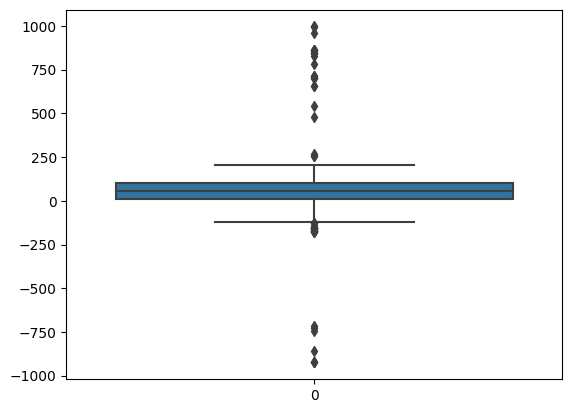

In [162]:
sns.boxplot(df['Longitude'])

<Axes: >

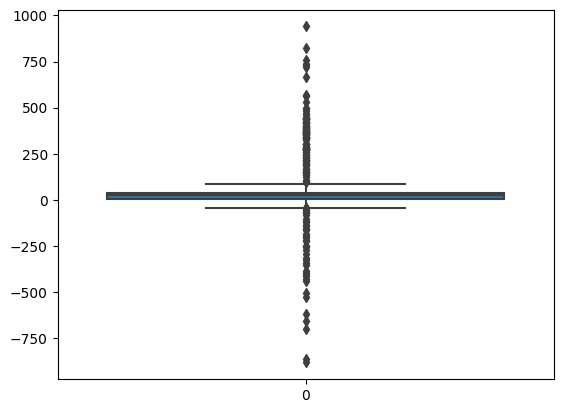

In [163]:
sns.boxplot(df['Latitude'])

## Valores faltantes

In [164]:
df_flood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5808 entries, 12 to 16634
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             5808 non-null   object 
 1   Year               5808 non-null   int64  
 2   Seq                5808 non-null   int64  
 3   Disaster Subgroup  5808 non-null   object 
 4   Disaster Type      5808 non-null   object 
 5   Disaster Subtype   3564 non-null   object 
 6   Country            5808 non-null   object 
 7   ISO                5808 non-null   object 
 8   Region             5808 non-null   object 
 9   Continent          5808 non-null   object 
 10  Location           5512 non-null   object 
 11  Origin             3446 non-null   object 
 12  Associated Dis     1383 non-null   object 
 13  Dis Mag Value      1777 non-null   float64
 14  Dis Mag Scale      5808 non-null   object 
 15  Latitude           998 non-null    object 
 16  Longitude          998

In [165]:
df_flood.isnull().sum()

Dis No                  0
Year                    0
Seq                     0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype     2244
Country                 0
ISO                     0
Region                  0
Continent               0
Location              296
Origin               2362
Associated Dis       4425
Dis Mag Value        4031
Dis Mag Scale           0
Latitude             4810
Longitude            4810
Start Year              0
Start Month            48
Start Day             946
End Year                0
End Month              47
End Day               943
Total Deaths         1580
Total Affected        917
Total Damages Adj    3909
dtype: int64

# Afectados por Inundaciones

### Muertos por Inundaciones:

7.004.082

Siete millones, cuatro mil, ochenta y dos.

In [166]:
df_flood_deaths = df_flood['Total Deaths'].sum()

### Afectados por Inundaciones:
3.968.190.458

Tres billones, novescientos sesenta y ocho millones, ciento noventa mil cuatrocientos cincuenta y ocho.

o

Tres mil novecientos sesenta y ocho millones, ciento noventa mil, cuatrocientos cincuenta y ocho.

In [167]:
df_flood_affected = df_flood['Total Affected'].sum()

## Análisis geográfico de muertos y afectados

### Muertos y afectados por continente

In [168]:
df_flood_continent_counts = df_flood['Continent'].value_counts()
df_flood_continent_counts

Asia        2407
Americas    1353
Africa      1213
Europe       678
Oceania      157
Name: Continent, dtype: int64

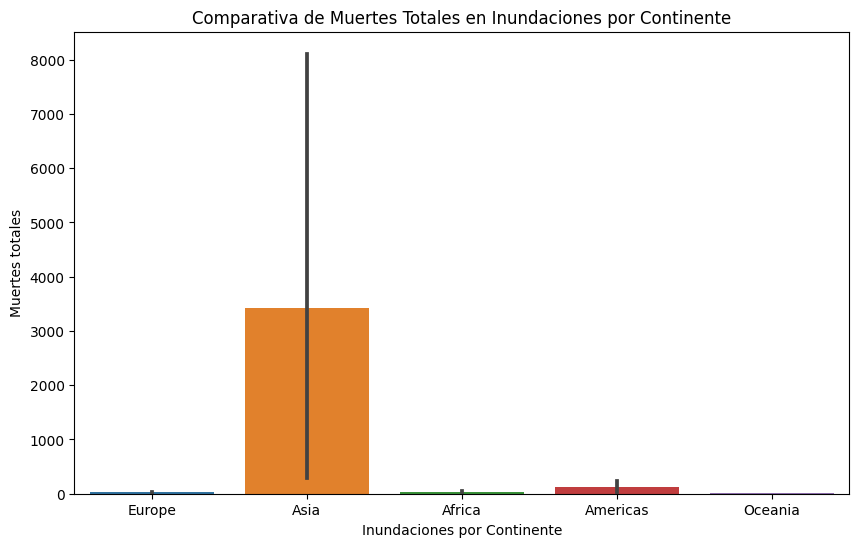

In [169]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Continent', y='Total Deaths')
plt.title('Comparativa de Muertes Totales en Inundaciones por Continente')
plt.xlabel('Inundaciones por Continente')
plt.ylabel('Muertes totales')
plt.show()

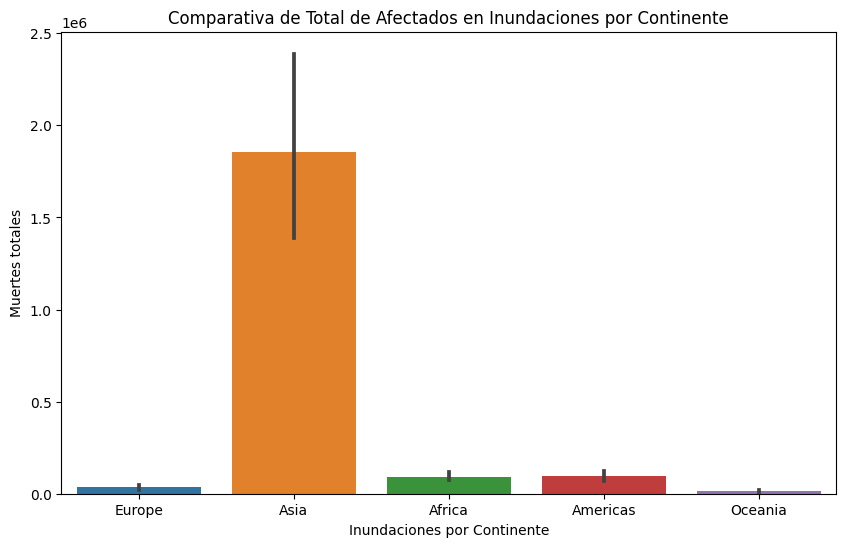

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Continent', y='Total Affected')
plt.title('Comparativa de Total de Afectados en Inundaciones por Continente')
plt.xlabel('Inundaciones por Continente')
plt.ylabel('Muertes totales')
plt.show()

Asia es el continente con más muertos y afectados respecto a otros.

### Muertos y afectados por región

In [171]:
df_flood_region_counts = df_flood['Region'].value_counts()
df_flood_region_counts

Southern Asia                869
South-Eastern Asia           791
South America                668
Eastern Asia                 489
Eastern Africa               469
Western Africa               312
Central America              272
Northern America             250
Southern Europe              234
Eastern Europe               234
Western Asia                 204
Northern Africa              182
Caribbean                    163
Middle Africa                162
Western Europe               140
Australia and New Zealand    111
Southern Africa               88
Central Asia                  54
Northern Europe               52
Melanesia                     38
Russian Federation            18
Micronesia                     5
Polynesia                      3
Name: Region, dtype: int64

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning:

All-NaN slice encountered



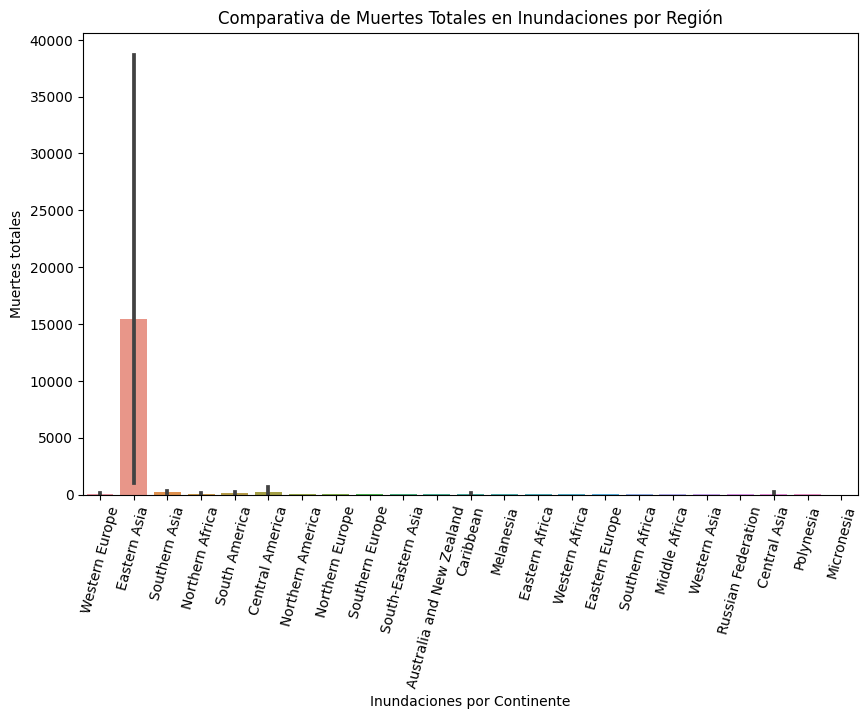

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Region', y='Total Deaths')
plt.title('Comparativa de Muertes Totales en Inundaciones por Región')
plt.xlabel('Inundaciones por Continente')
plt.ylabel('Muertes totales')
plt.xticks(rotation=75)
plt.show()

El Este Asiático supera por creces el número de muertes por inundaciones.

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice



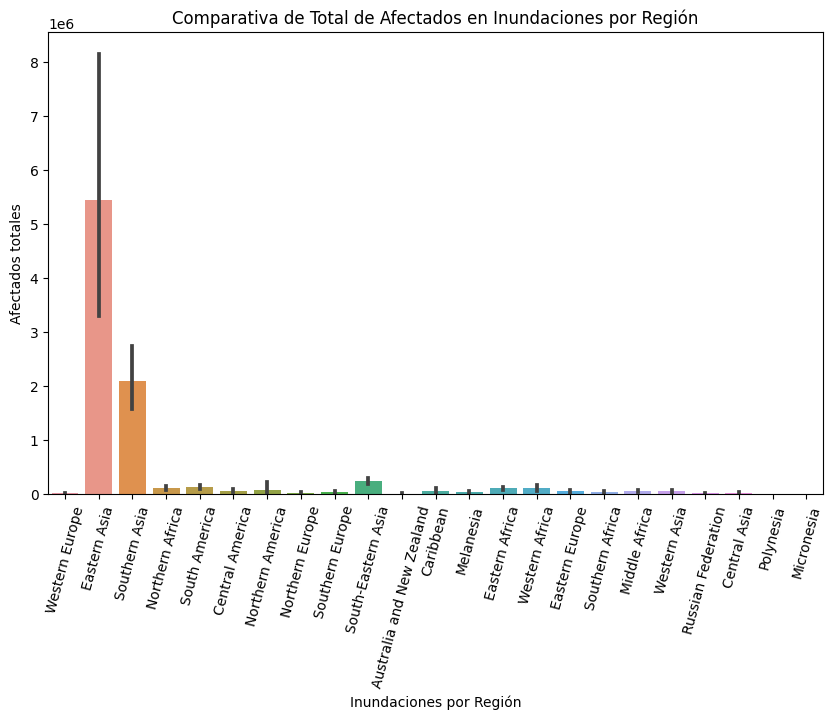

In [173]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Region', y='Total Affected')
plt.title('Comparativa de Total de Afectados en Inundaciones por Región')
plt.xlabel('Inundaciones por Región')
plt.ylabel('Afectados totales')
plt.xticks(rotation=75)
plt.show()

El Este y Sur de Asia tienen altos niveles de personas afectadas por inundaciones, seguidos de lejos por el Sudeste Asiático.

### Muertos y afectados por país

In [174]:
df_flood_country_counts = df_flood['Country'].value_counts()
df_flood_country_counts

India                             316
China                             314
Indonesia                         265
United States of America (the)    205
Brazil                            174
                                 ... 
Guadeloupe                          1
Saint Kitts and Nevis               1
Iceland                             1
Turkmenistan                        1
Sao Tome and Principe               1
Name: Country, Length: 190, dtype: int64

#### Total de Muertes en Países Agrupados por Regiones

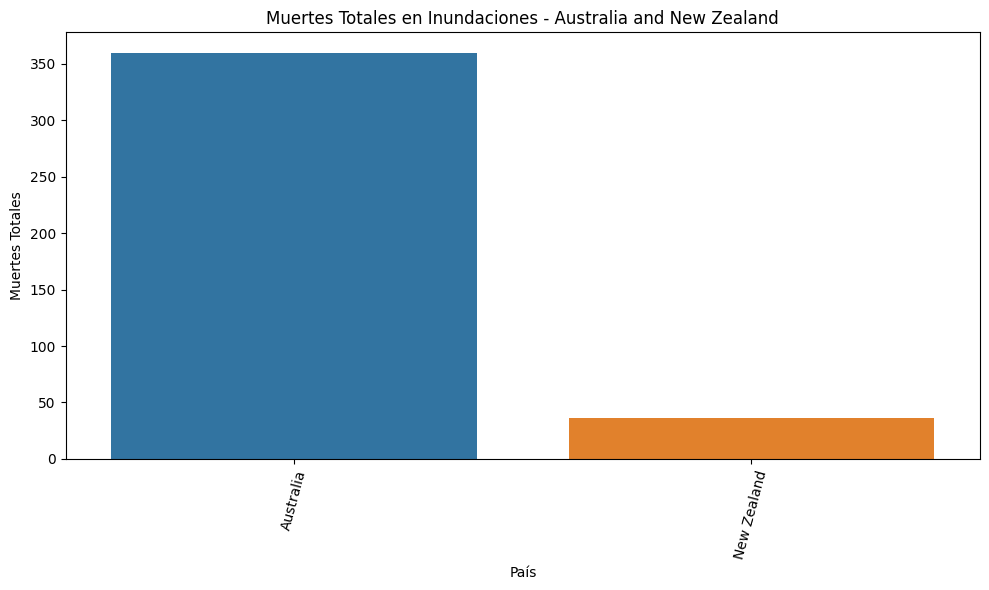

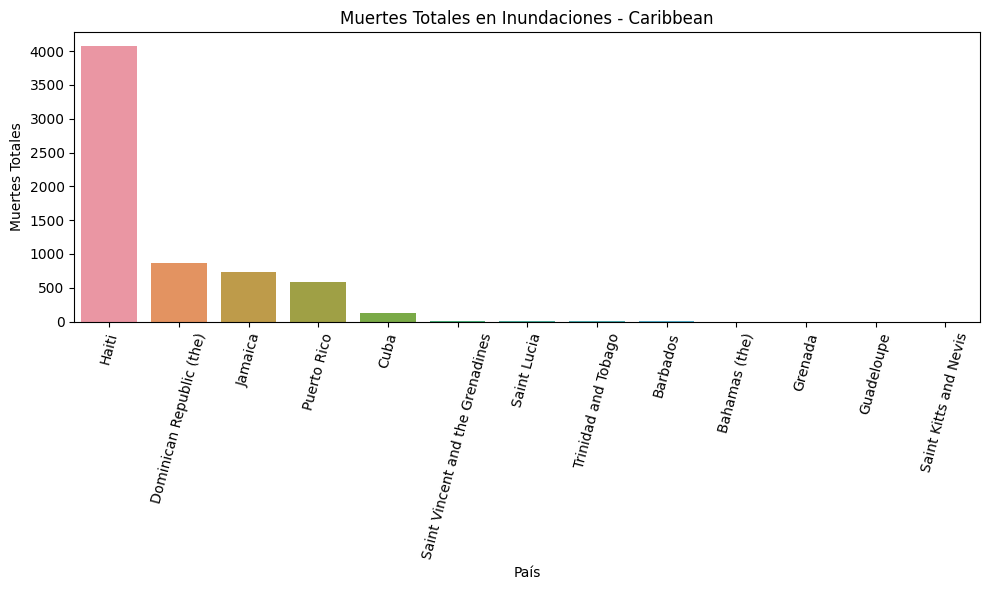

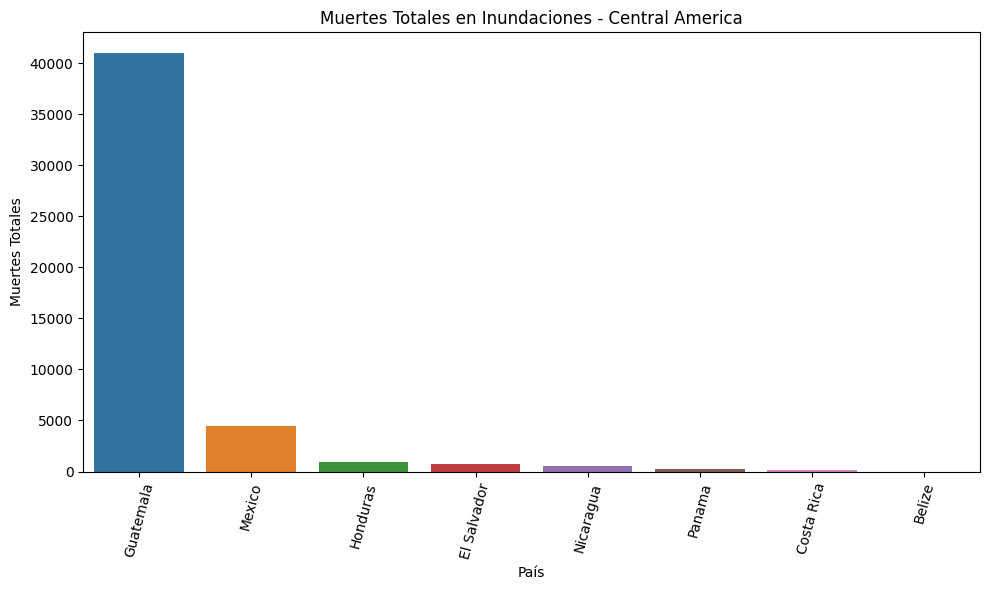

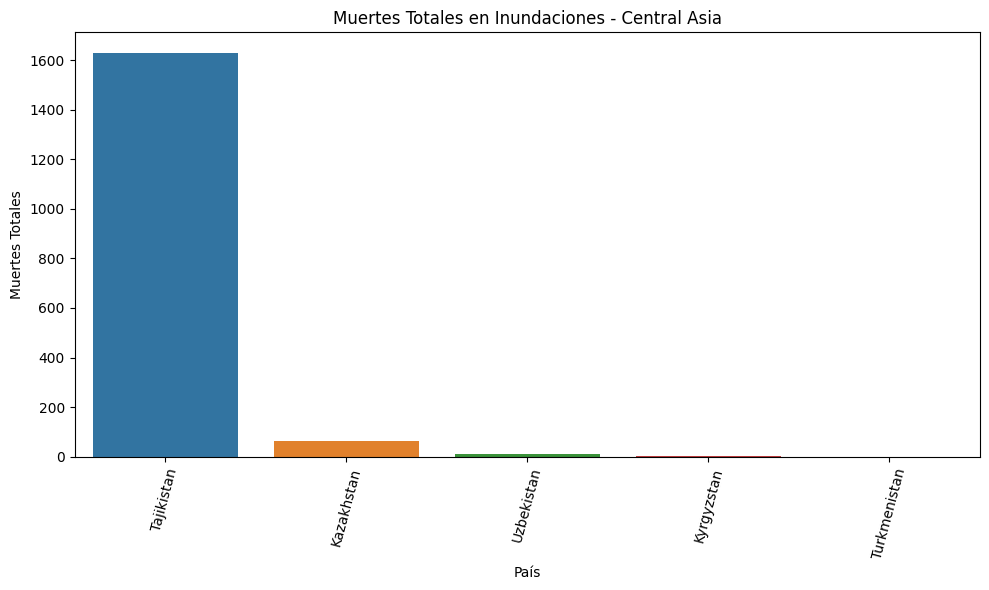

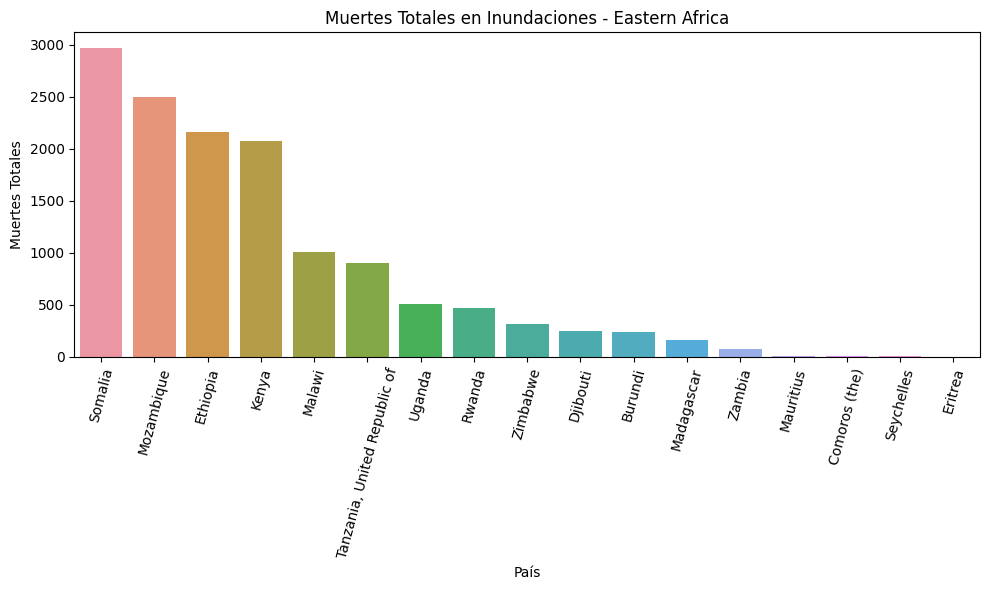

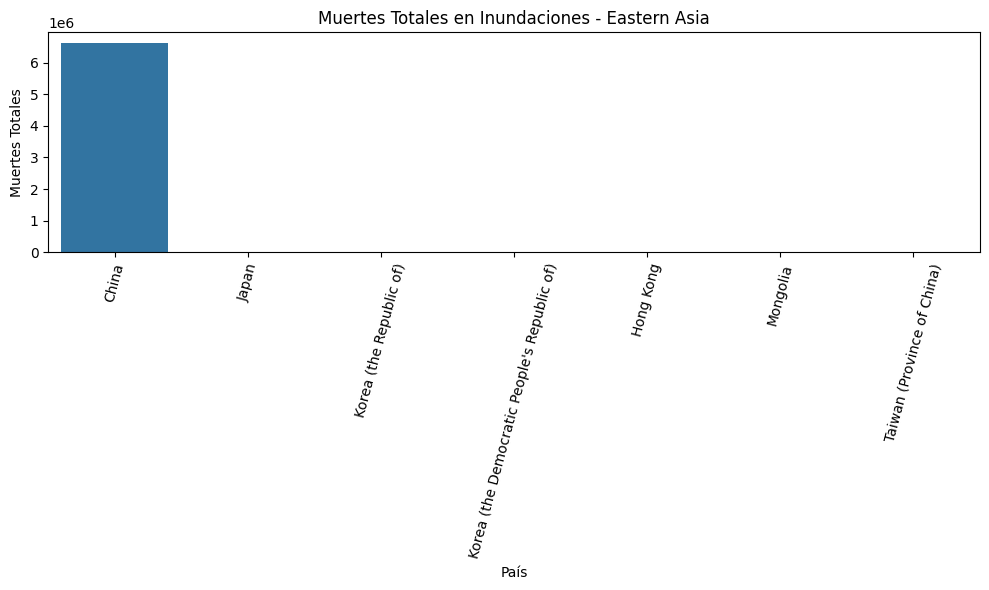

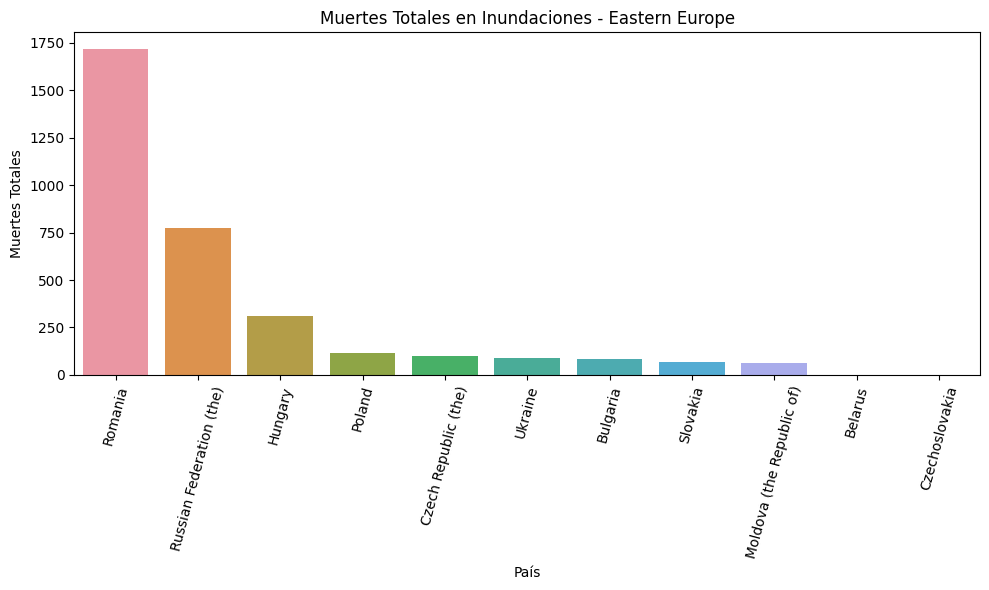

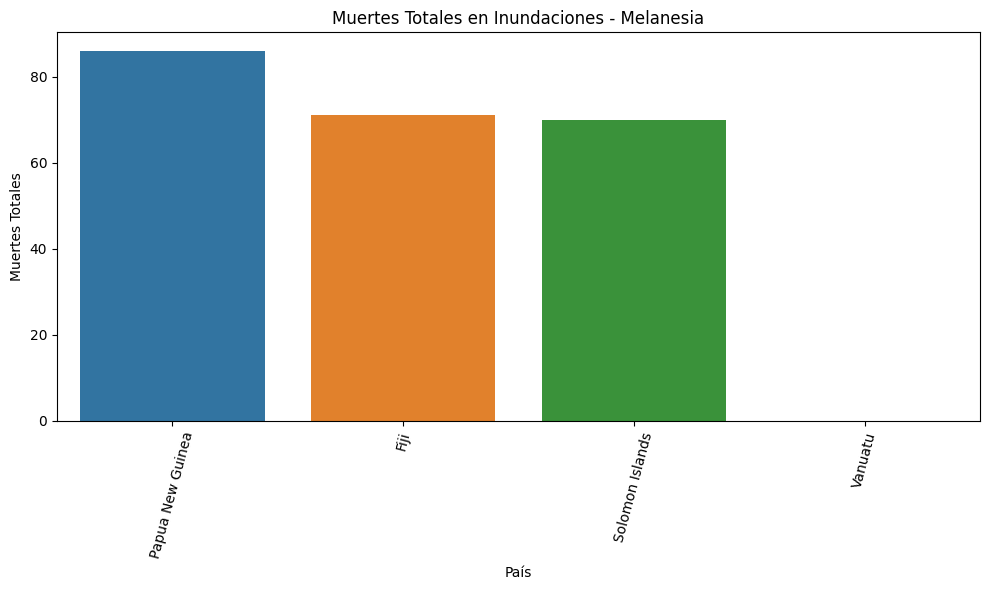

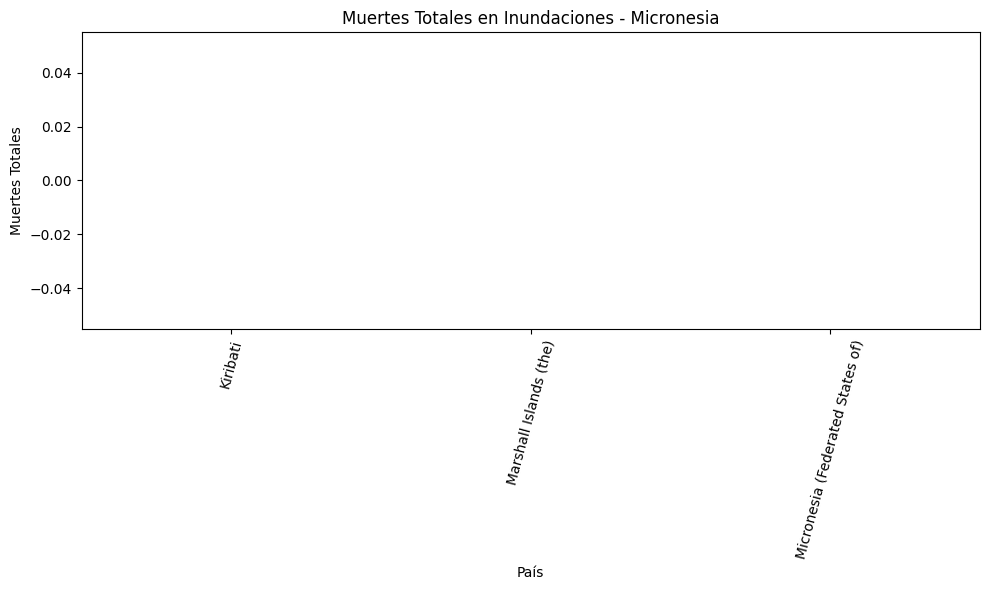

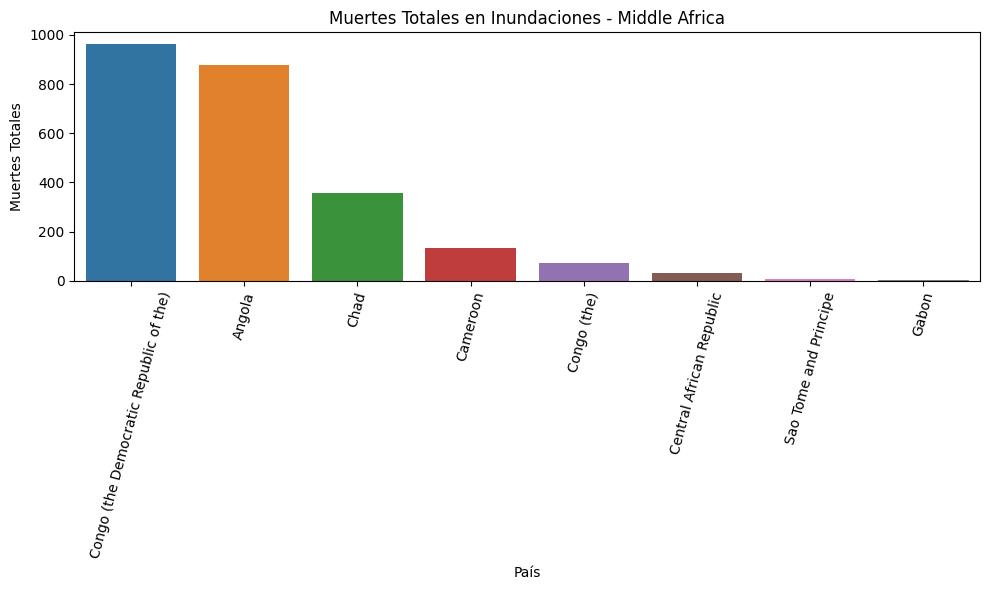

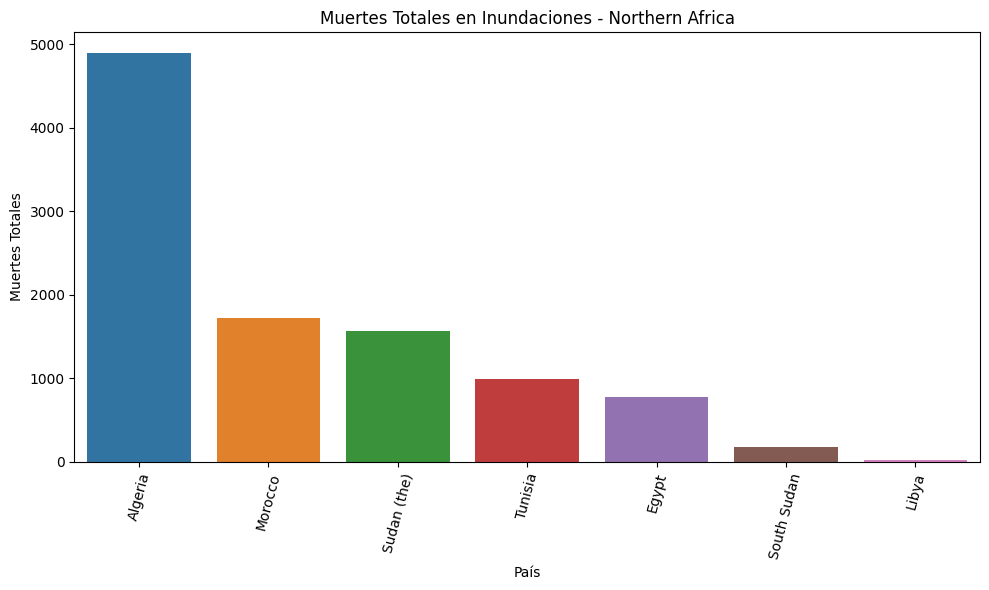

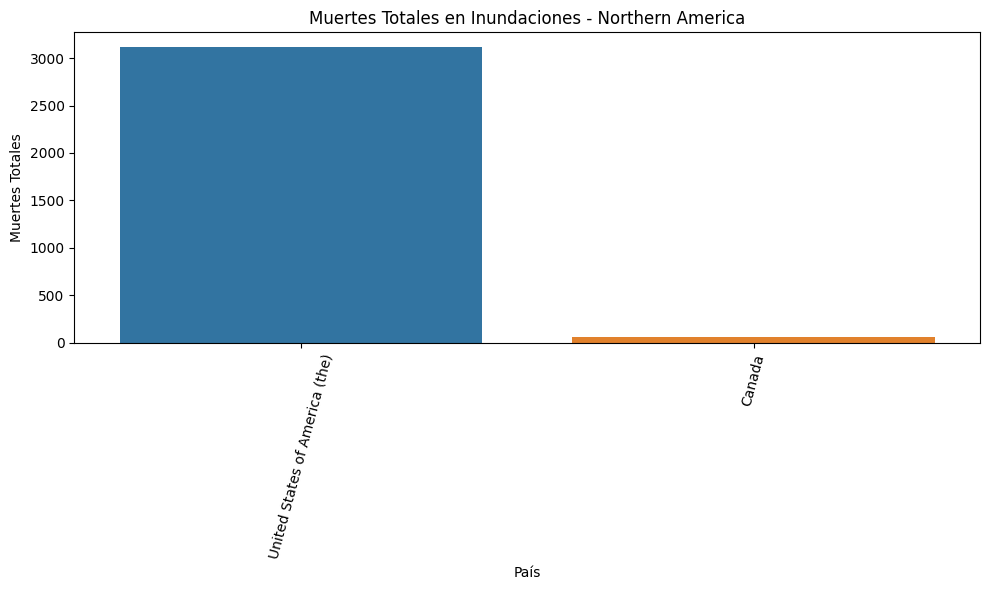

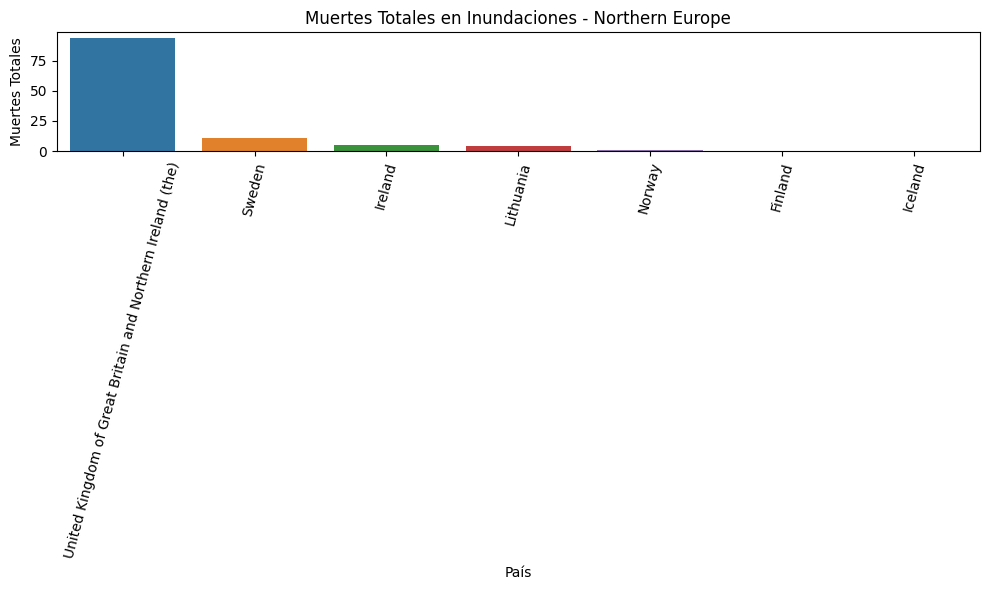

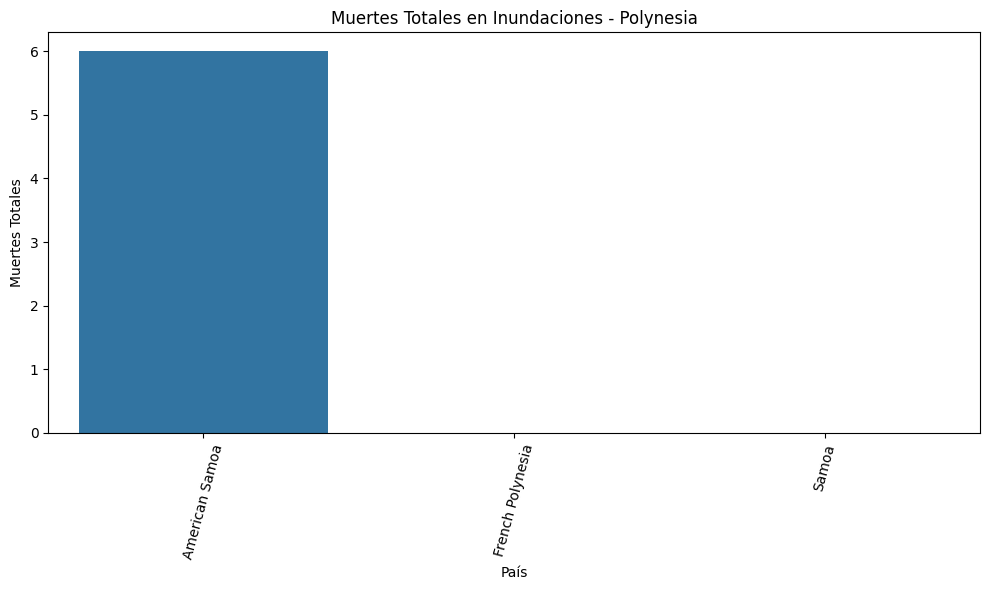

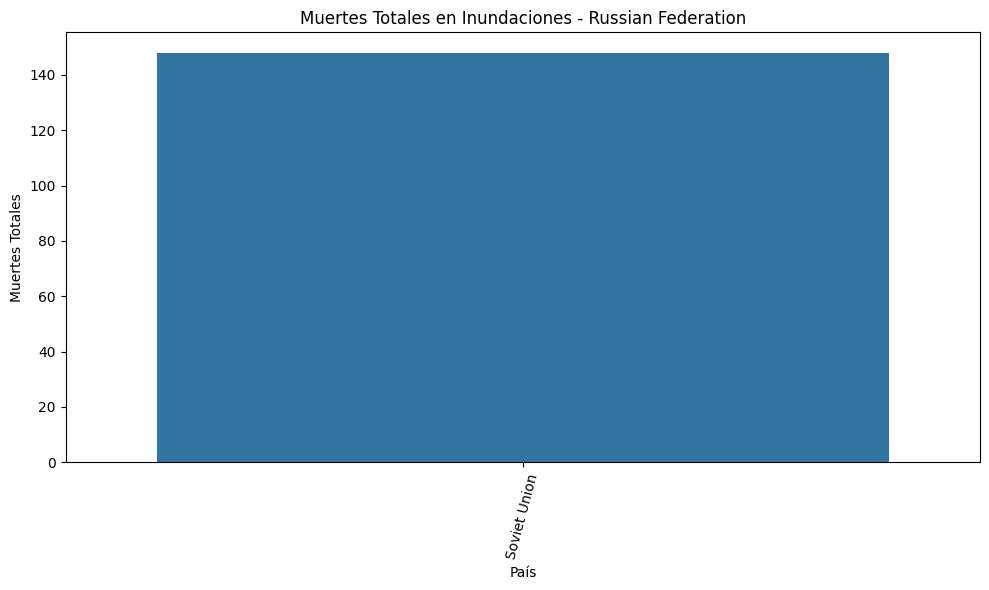

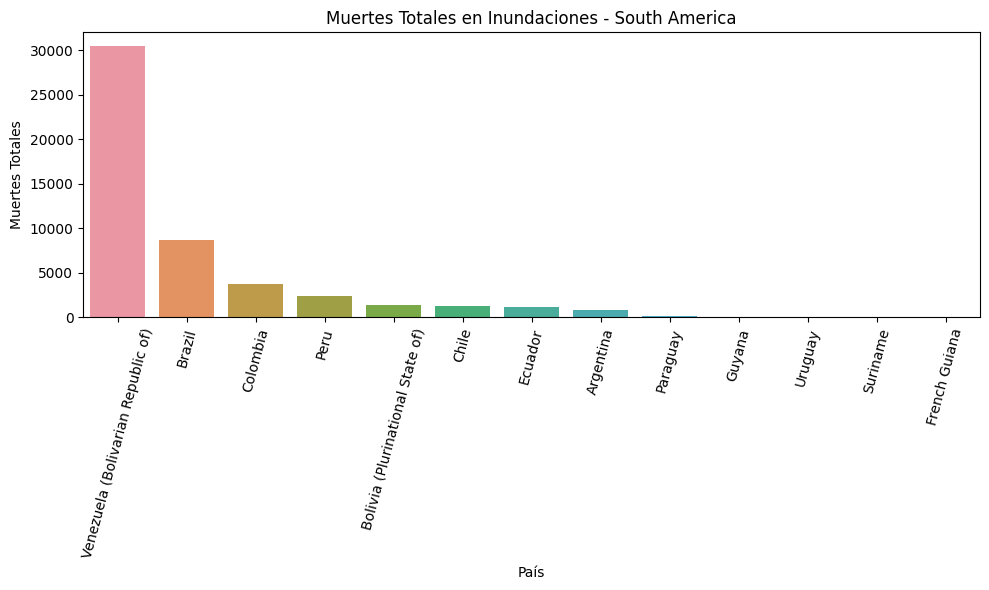

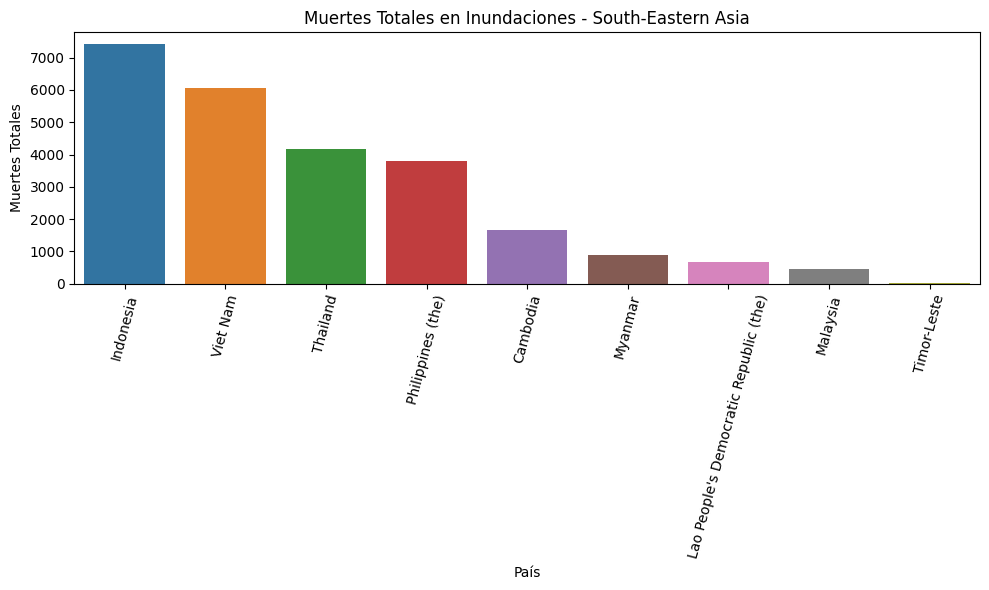

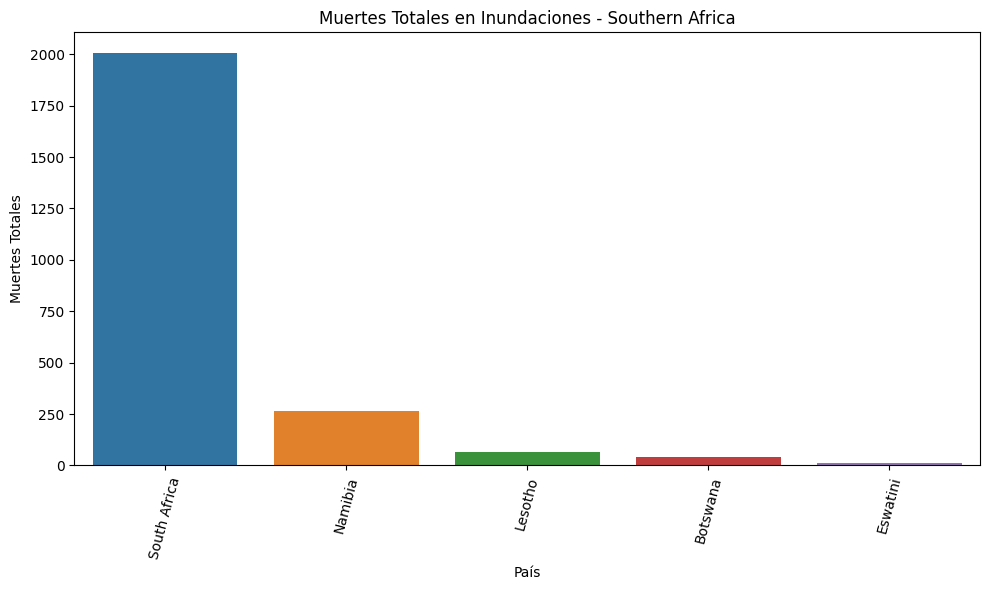

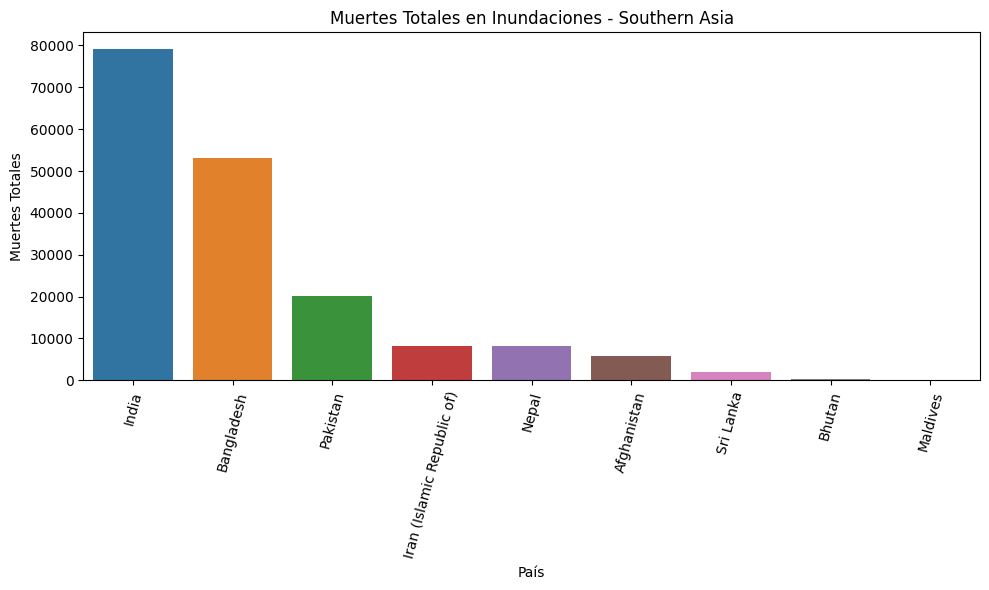

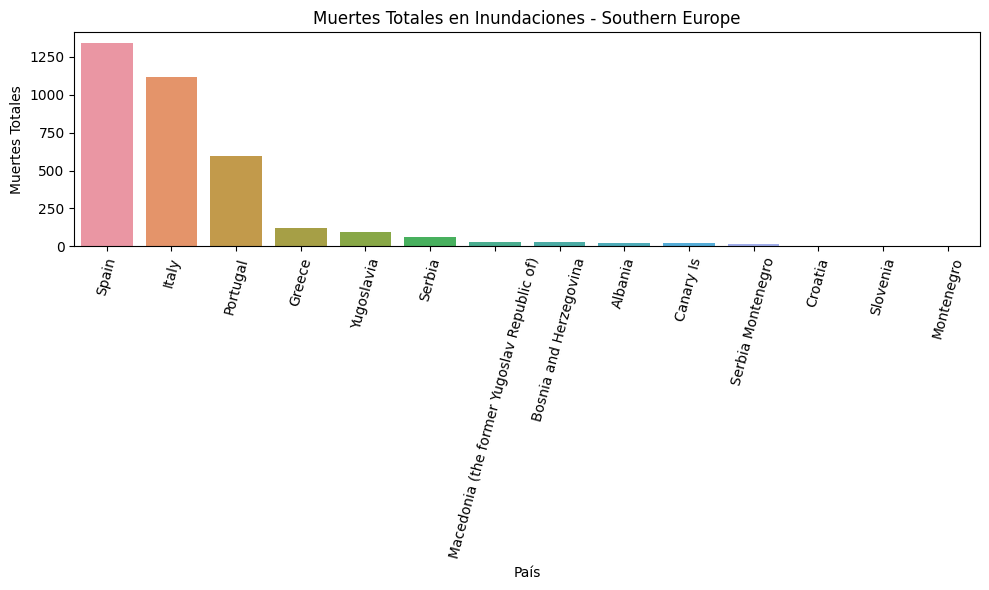

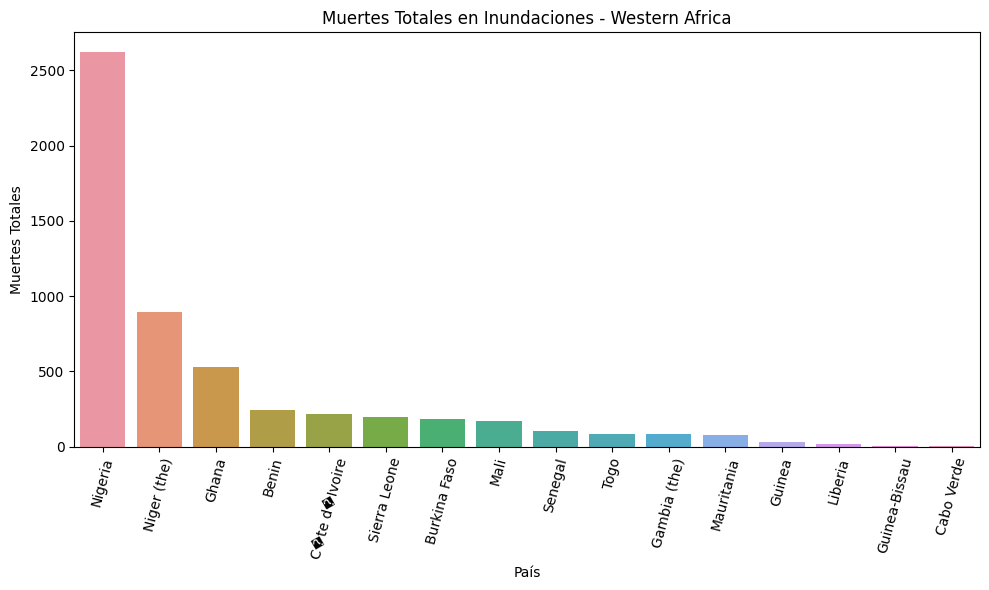

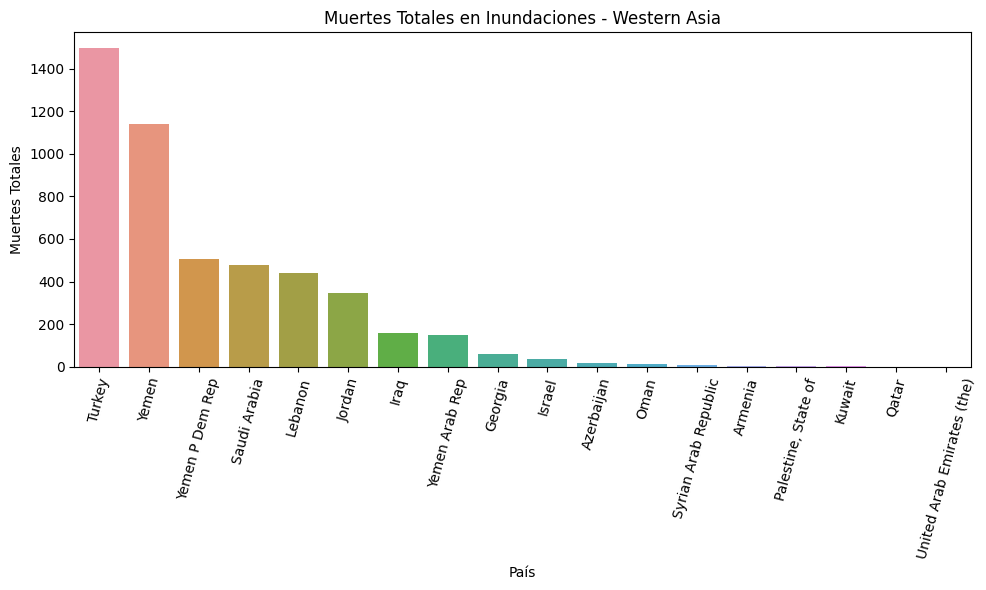

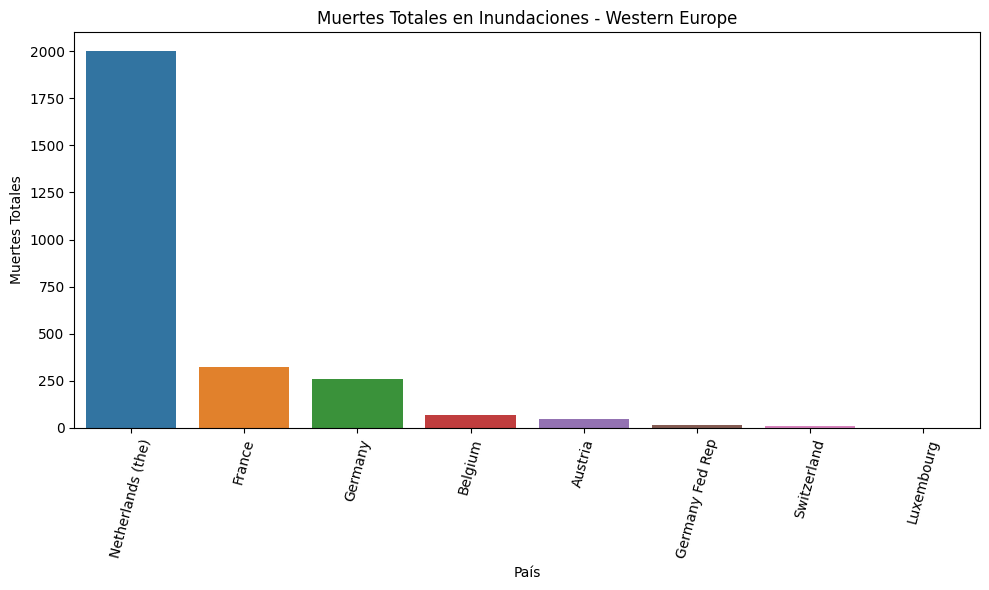

In [175]:
# Agrupar por región y calcular la suma total de muertes por cada país
region_country_deaths = df_flood.groupby(['Region', 'Country'])['Total Deaths'].sum().reset_index()

# Ordenar por Region y Total Deaths
region_country_deaths = region_country_deaths.sort_values(['Region', 'Total Deaths'], ascending=[True, False])

# Unique de regiones
regions = region_country_deaths['Region'].unique()

# Crear barplot separado por cada región
for region in regions:
    plt.figure(figsize=(10, 6))
    region_data = region_country_deaths[region_country_deaths['Region'] == region]
    sns.barplot(data=region_data, x='Country', y='Total Deaths')
    plt.title(f'Muertes Totales en Inundaciones - {region}')
    plt.xlabel('País')
    plt.ylabel('Muertes Totales')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

#### Total de Afectados en Países Agrupados por Regiones

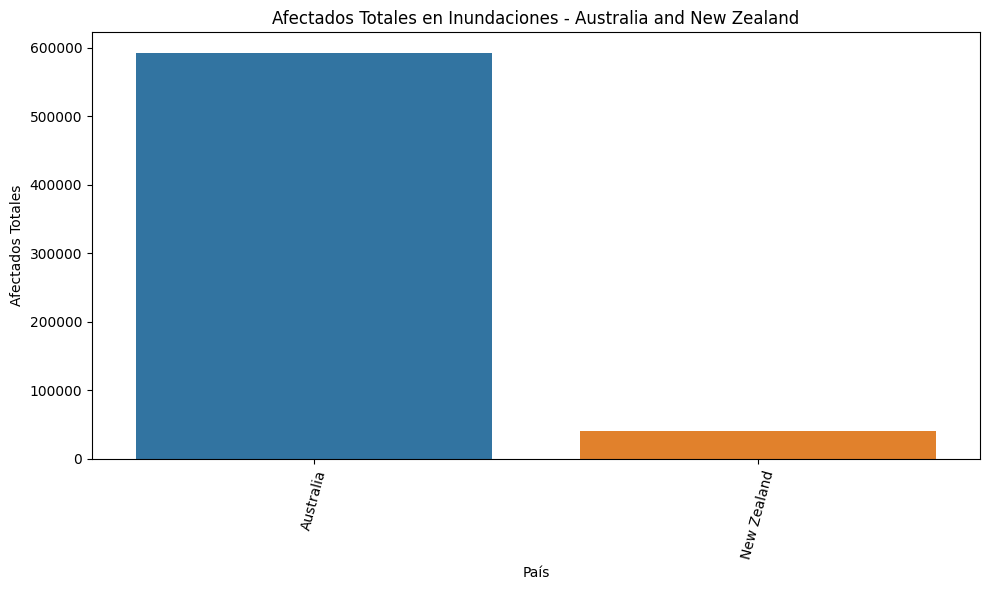

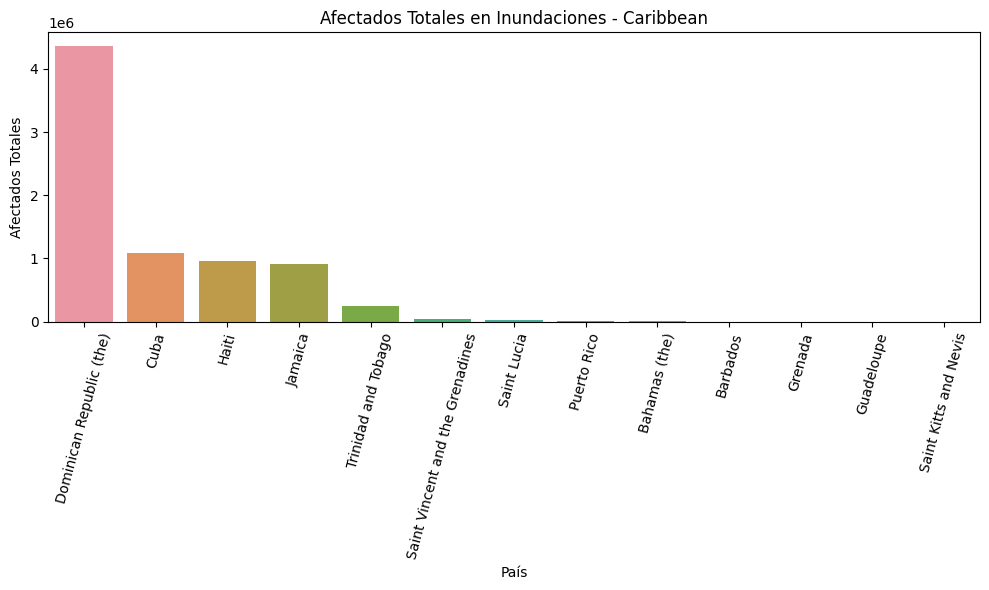

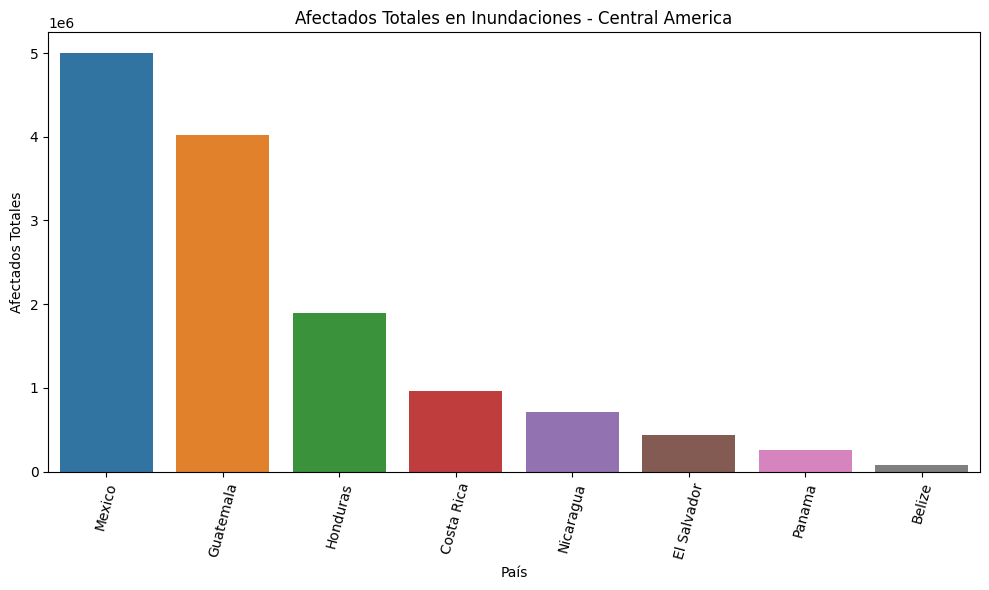

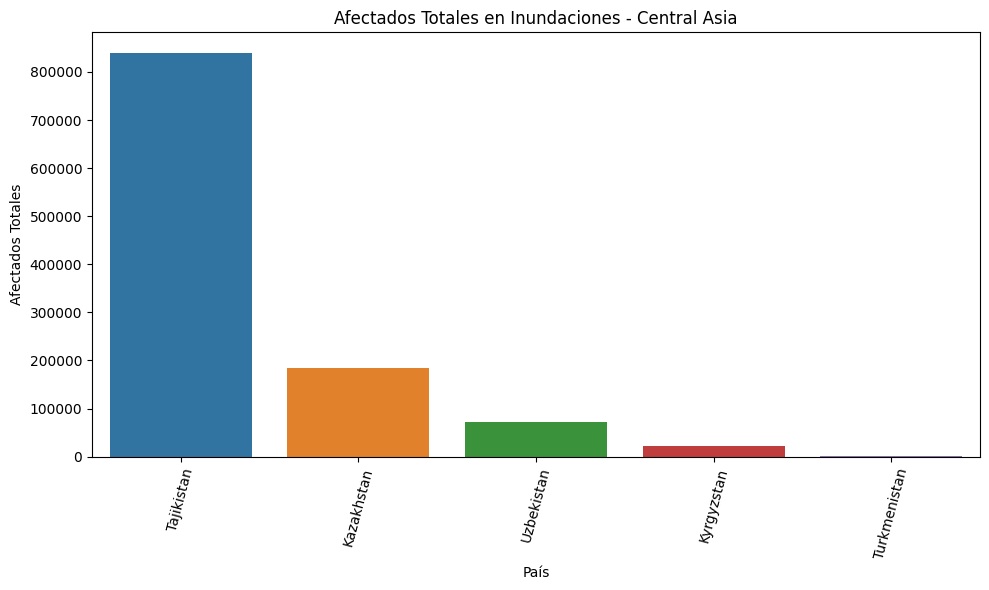

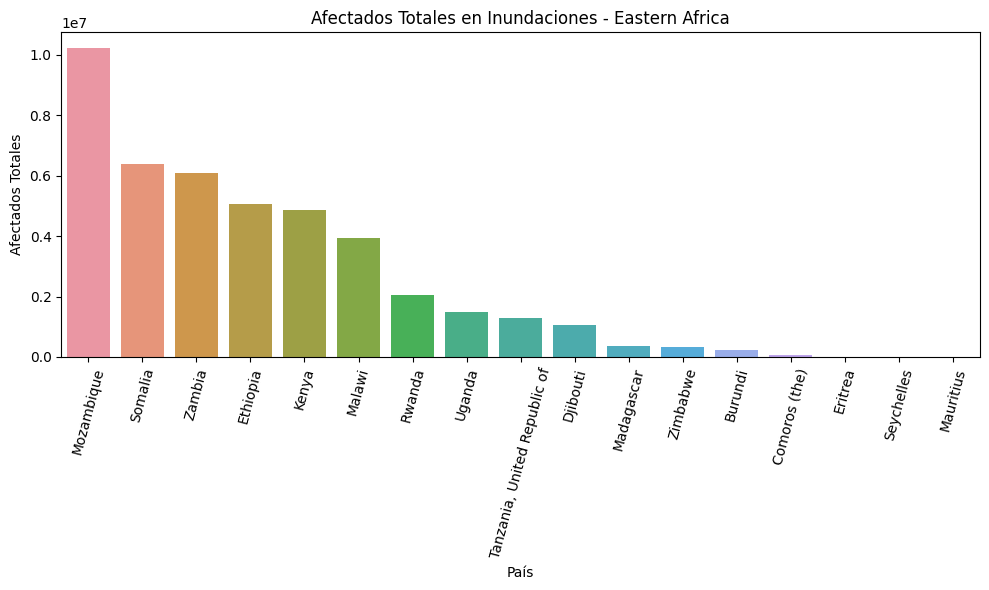

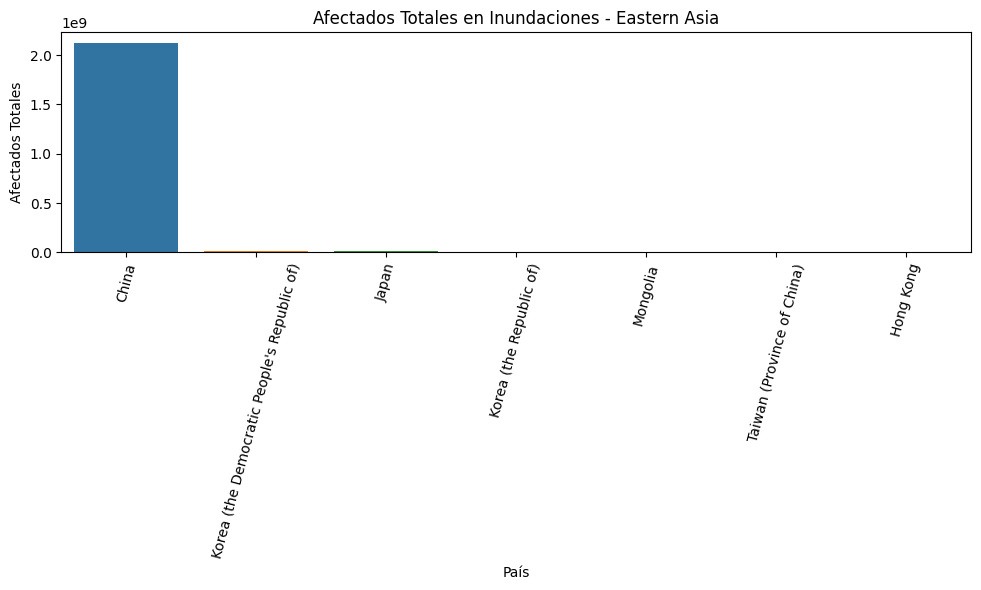

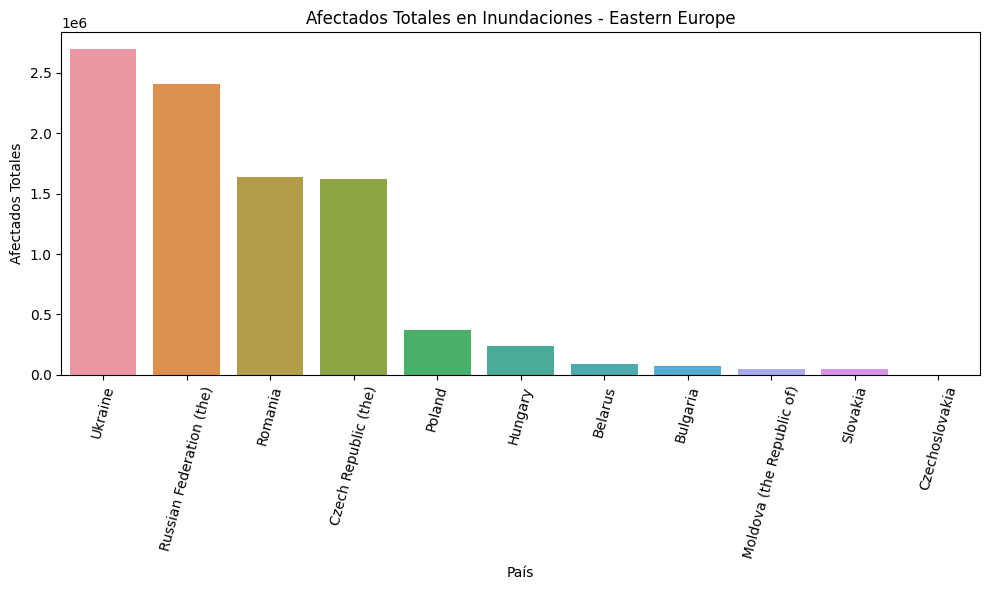

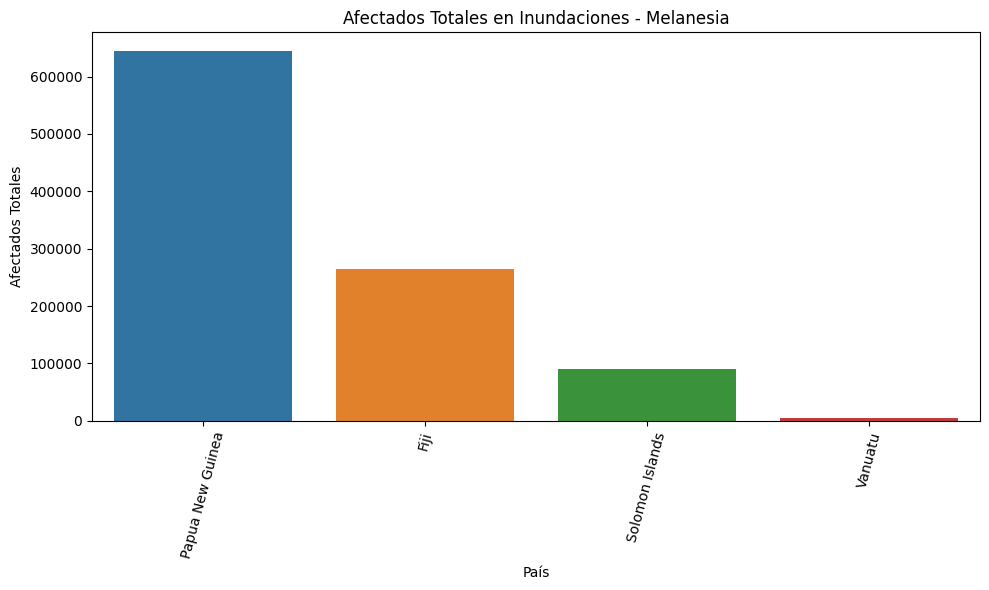

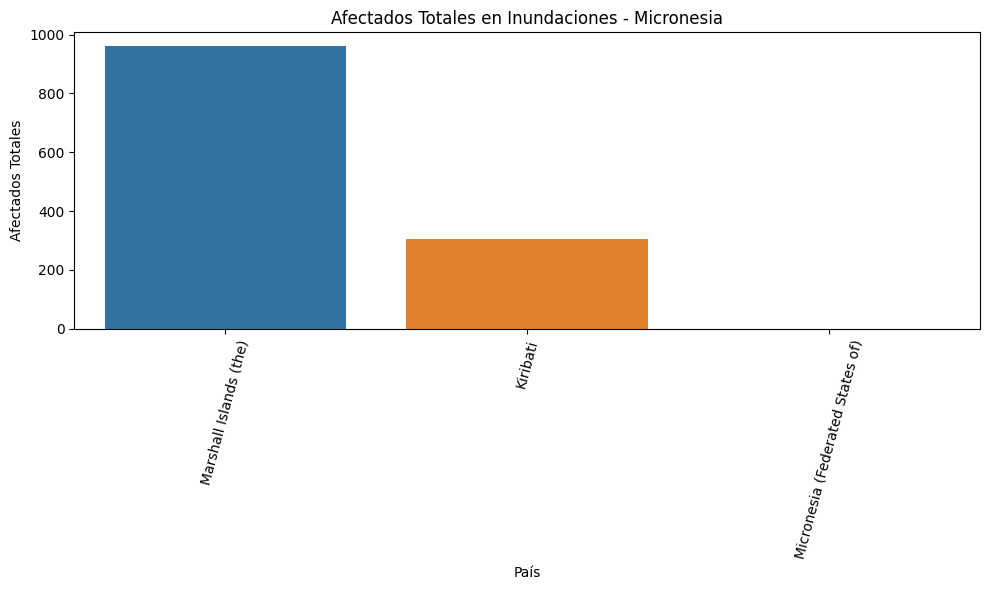

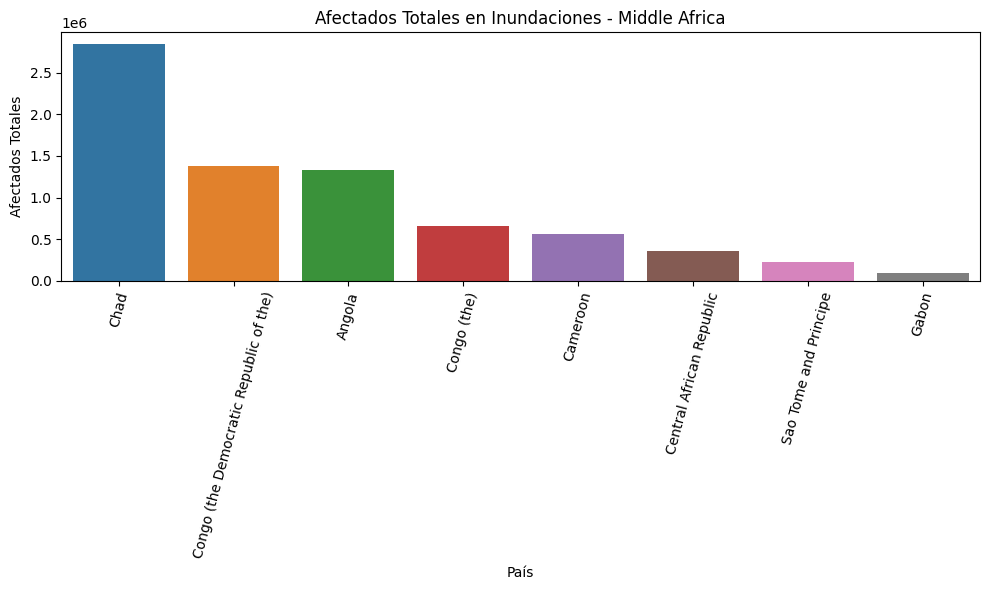

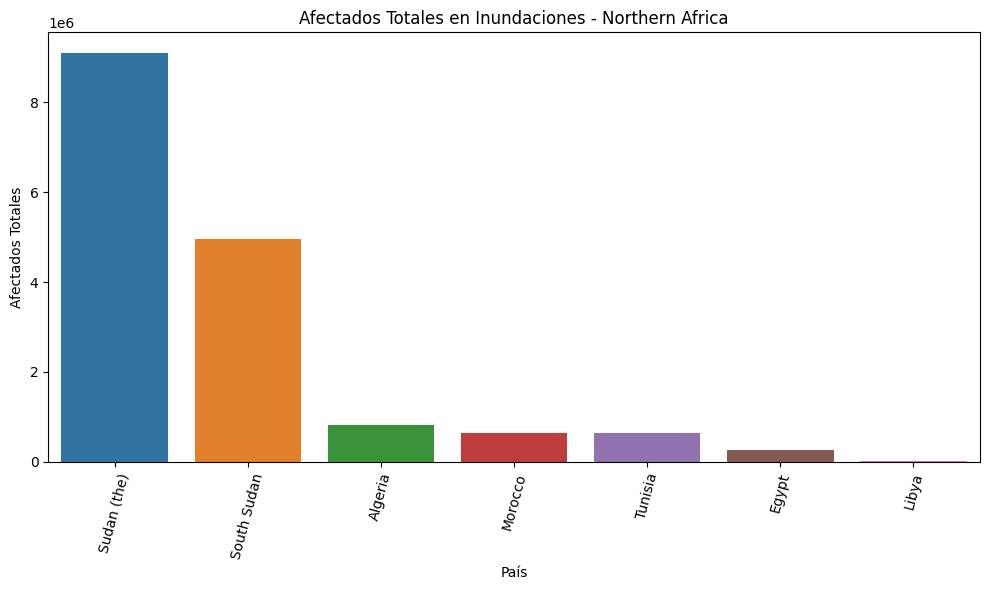

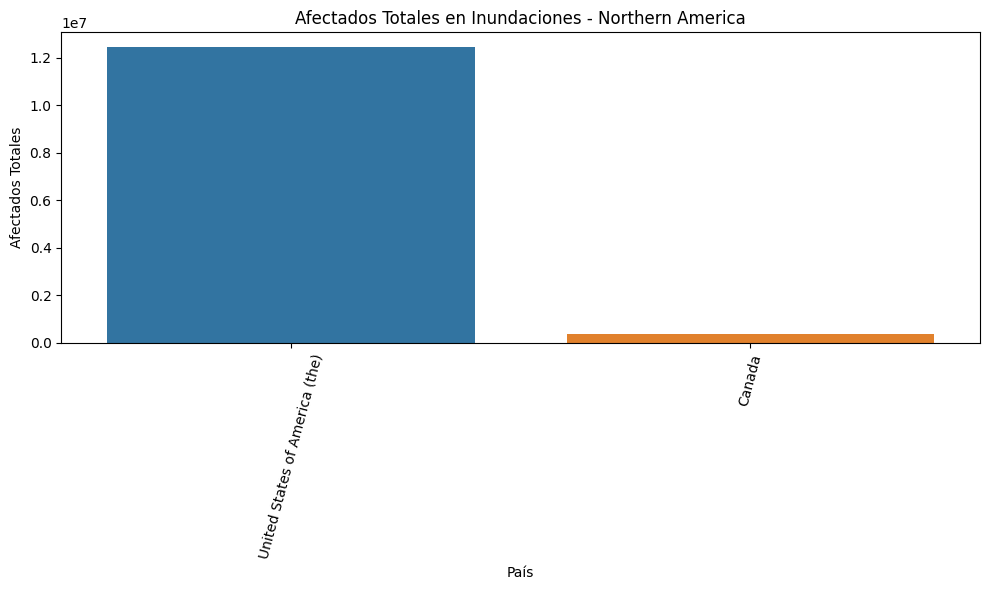

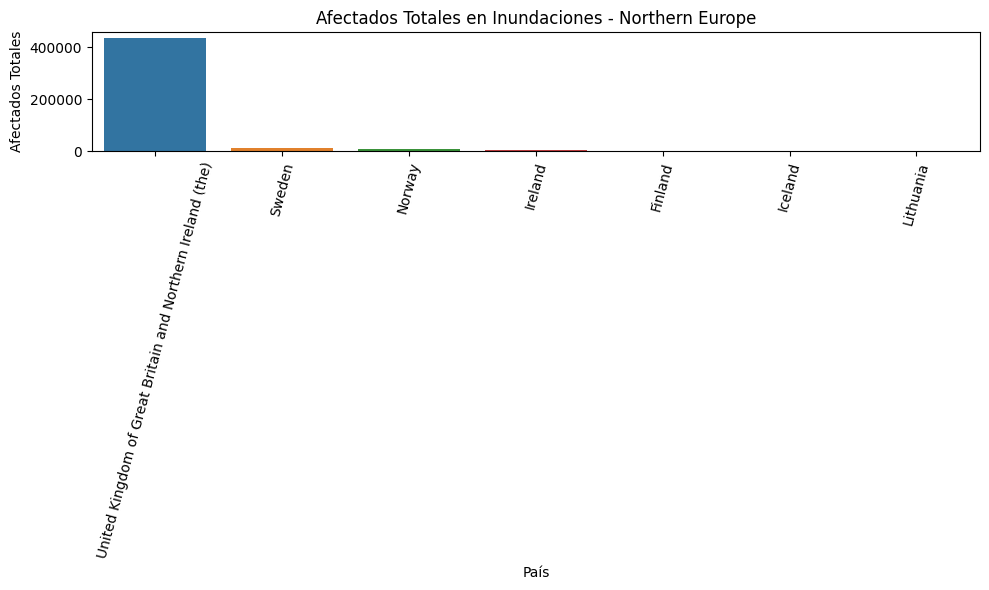

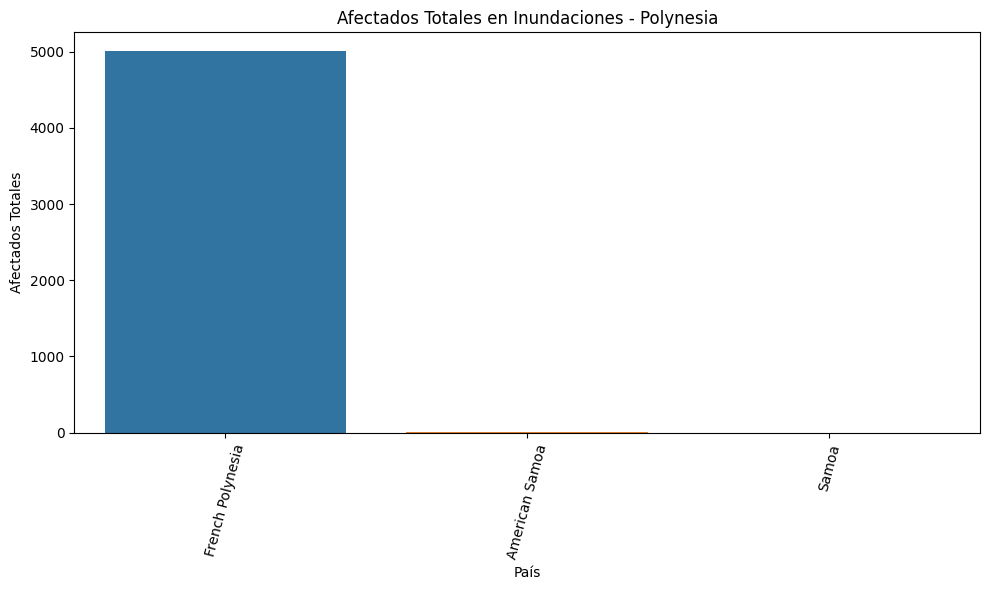

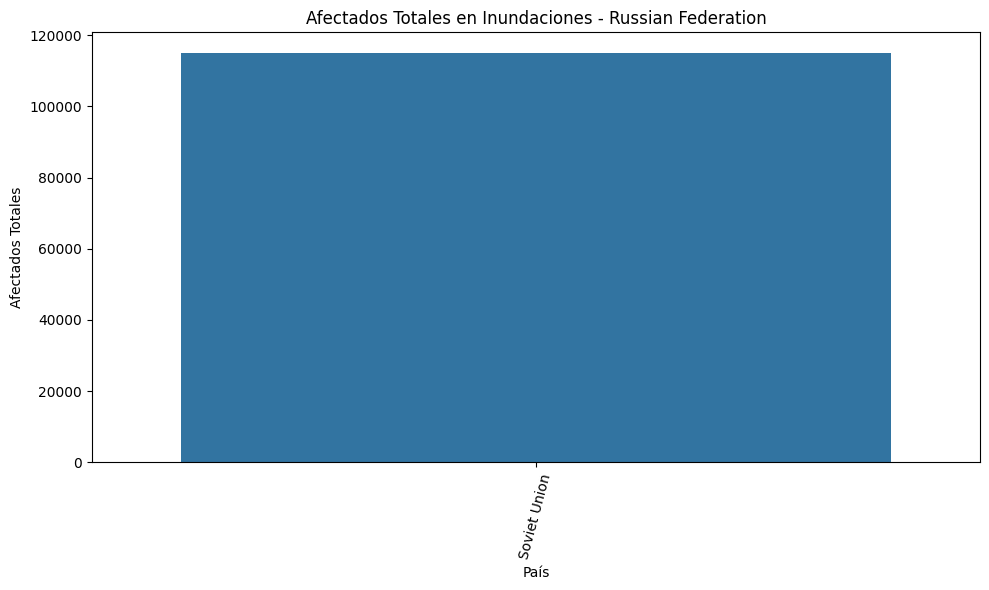

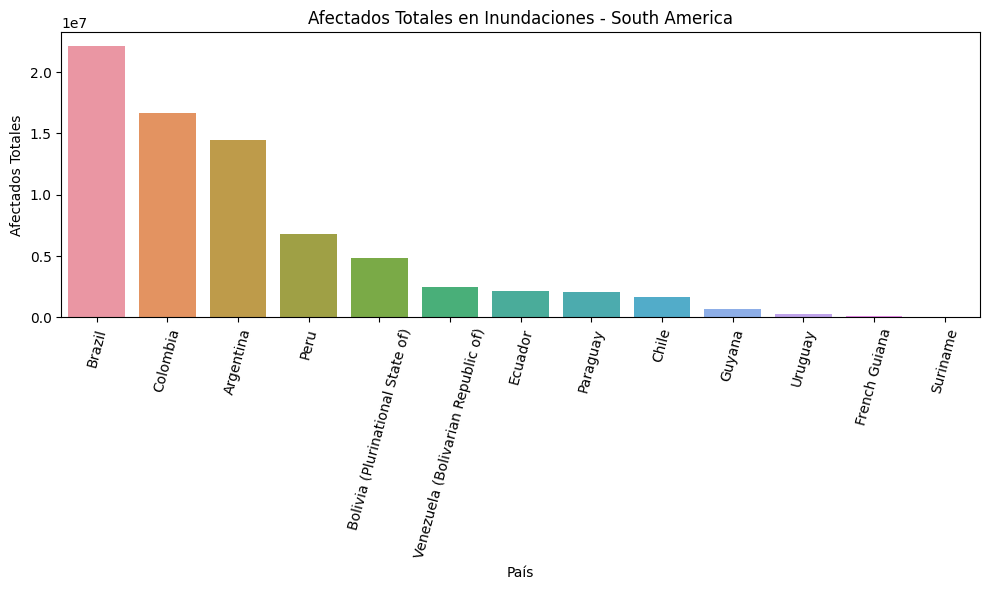

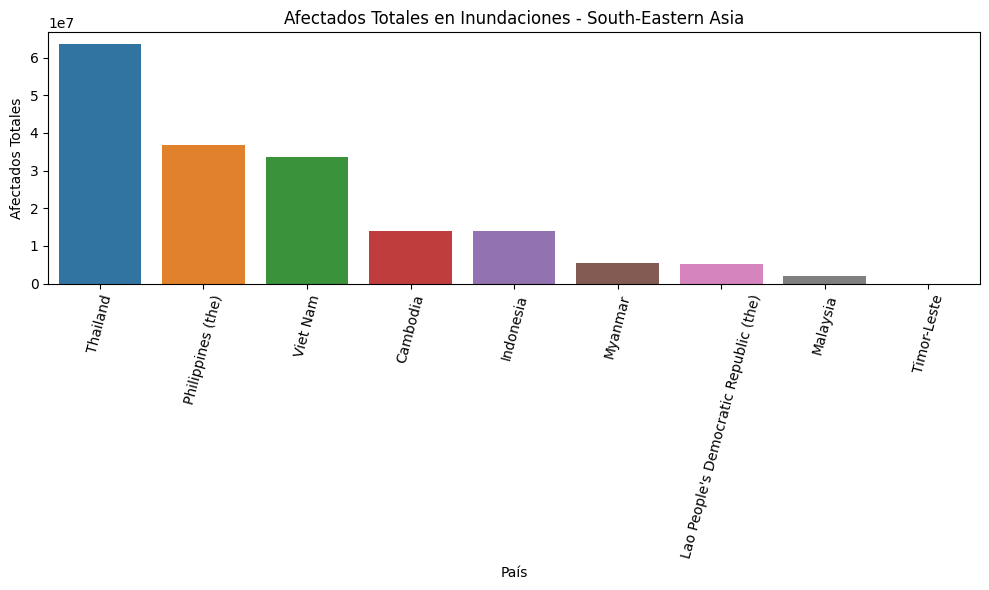

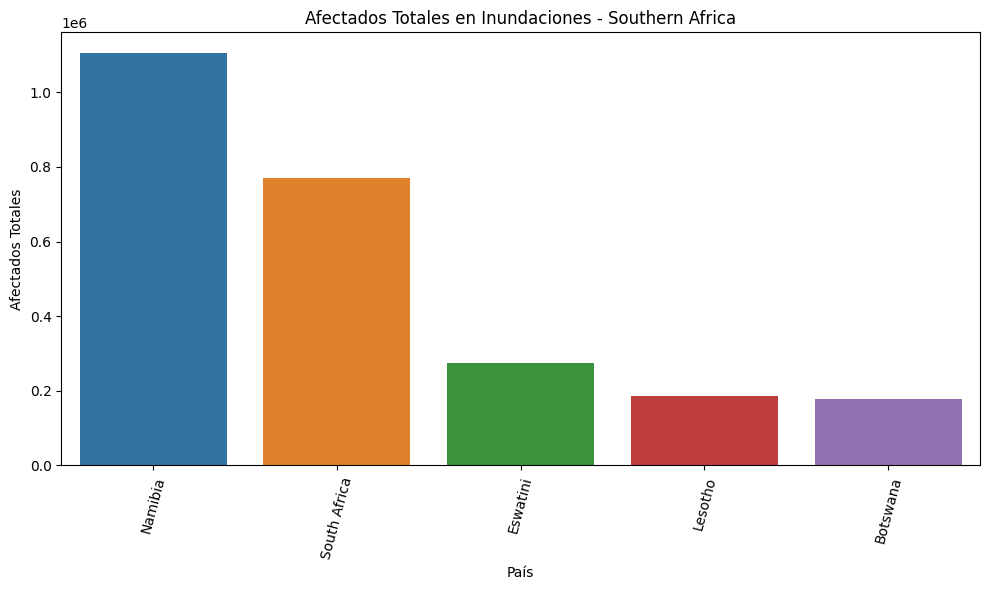

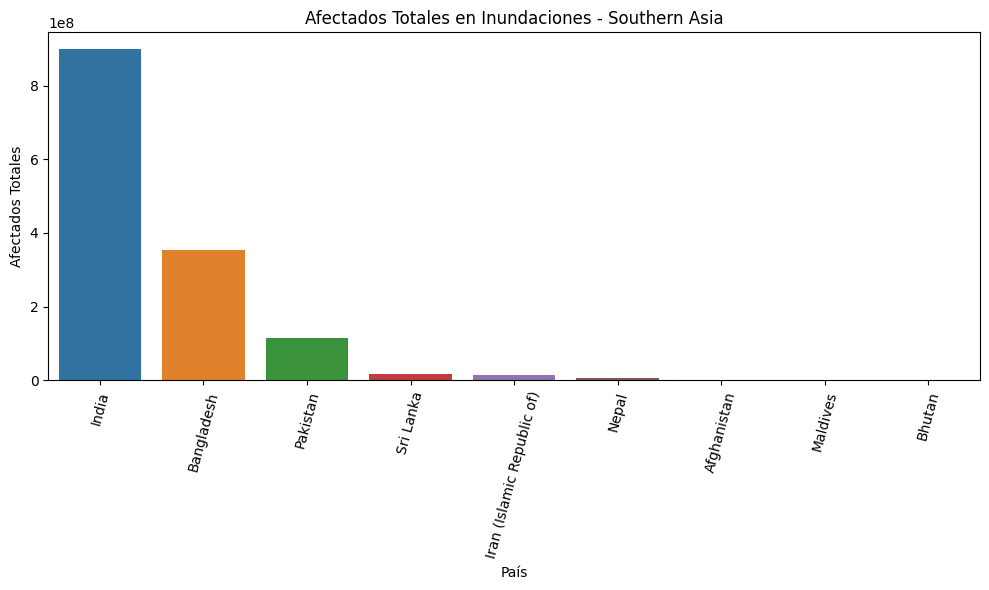

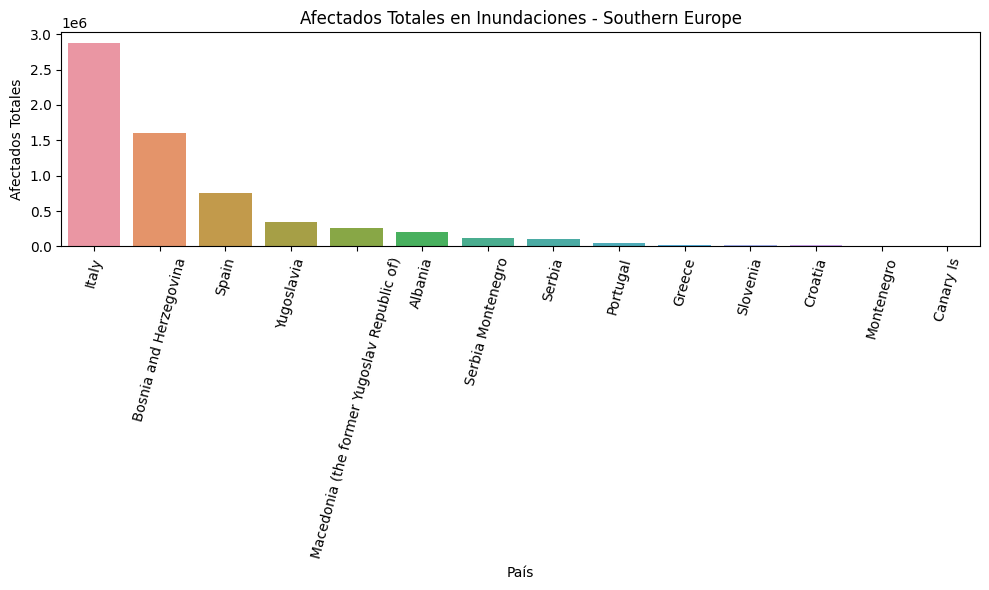

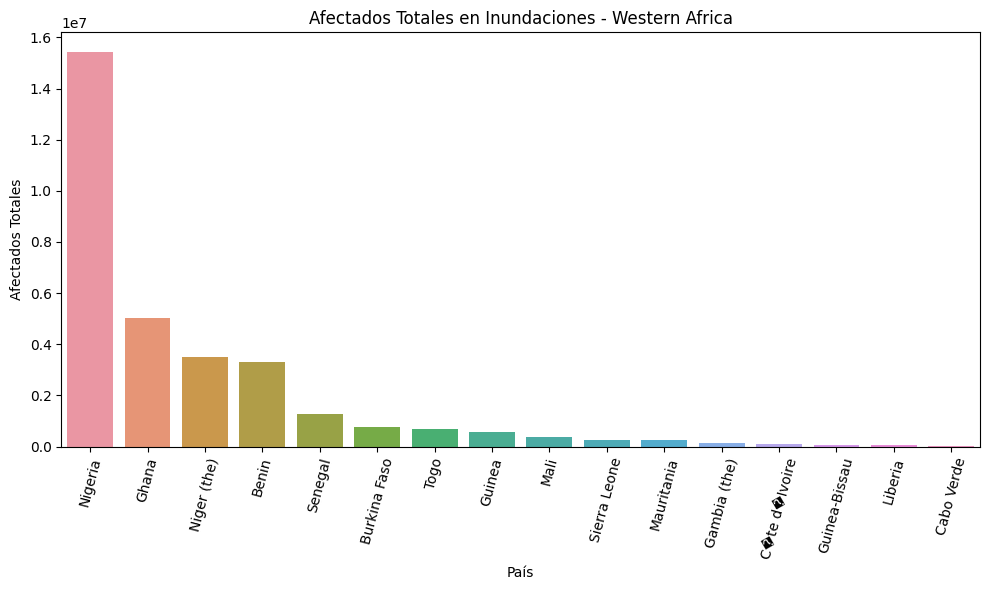

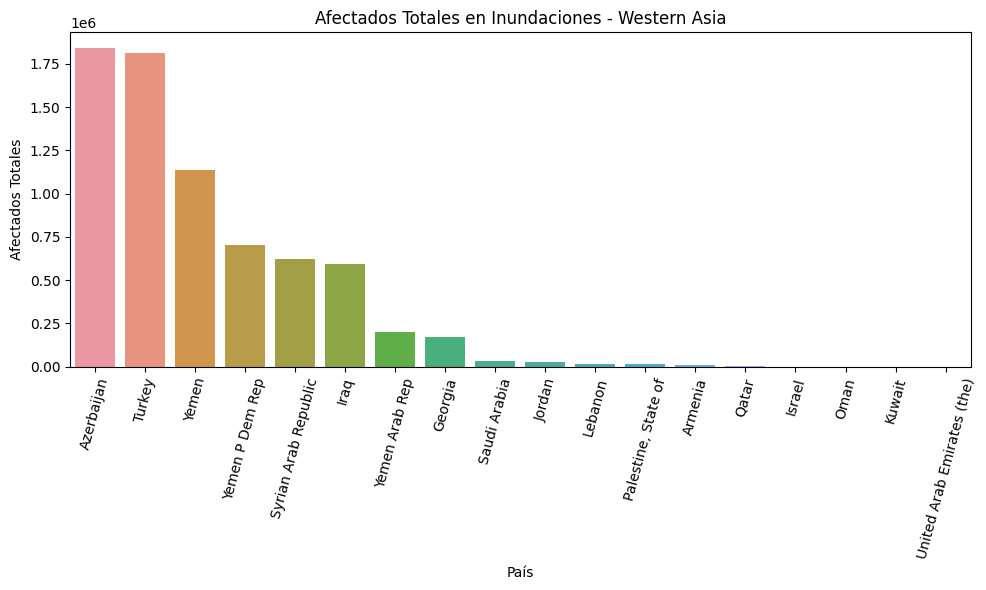

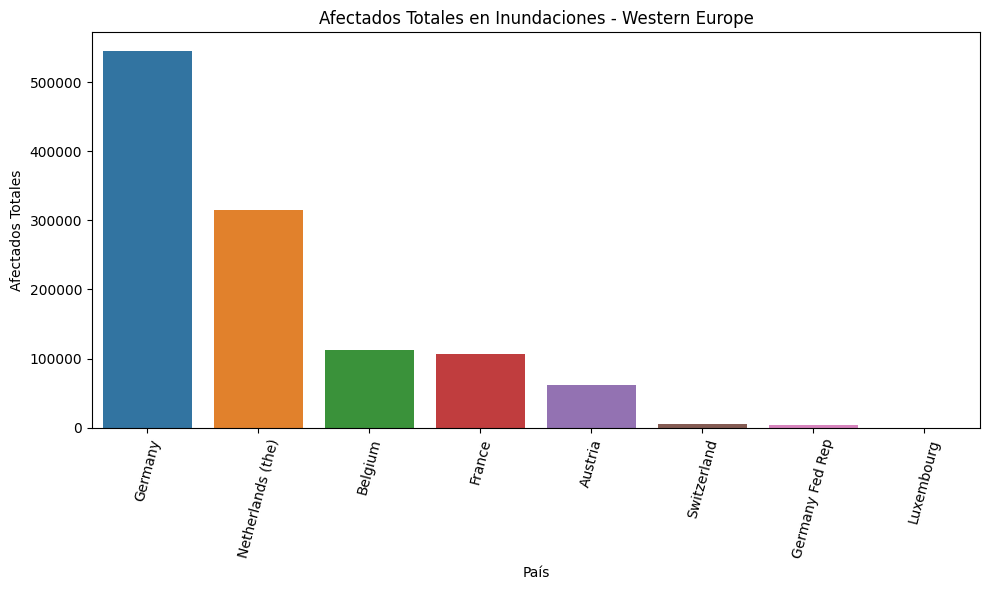

In [176]:
# Agrupar por región y calcular la suma total de muertes por cada país
region_country_deaths = df_flood.groupby(['Region', 'Country'])['Total Affected'].sum().reset_index()

# Ordenar por Region y Total Deaths
region_country_deaths = region_country_deaths.sort_values(['Region', 'Total Affected'], ascending=[True, False])

# Unique de regiones
regions = region_country_deaths['Region'].unique()

# Crear barplot separado por cada región
for region in regions:
    plt.figure(figsize=(10, 6))
    region_data = region_country_deaths[region_country_deaths['Region'] == region]
    sns.barplot(data=region_data, x='Country', y='Total Affected')
    plt.title(f'Afectados Totales en Inundaciones - {region}')
    plt.xlabel('País')
    plt.ylabel('Afectados Totales')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

c:\Users\AleEng\AppData\Local\Prog

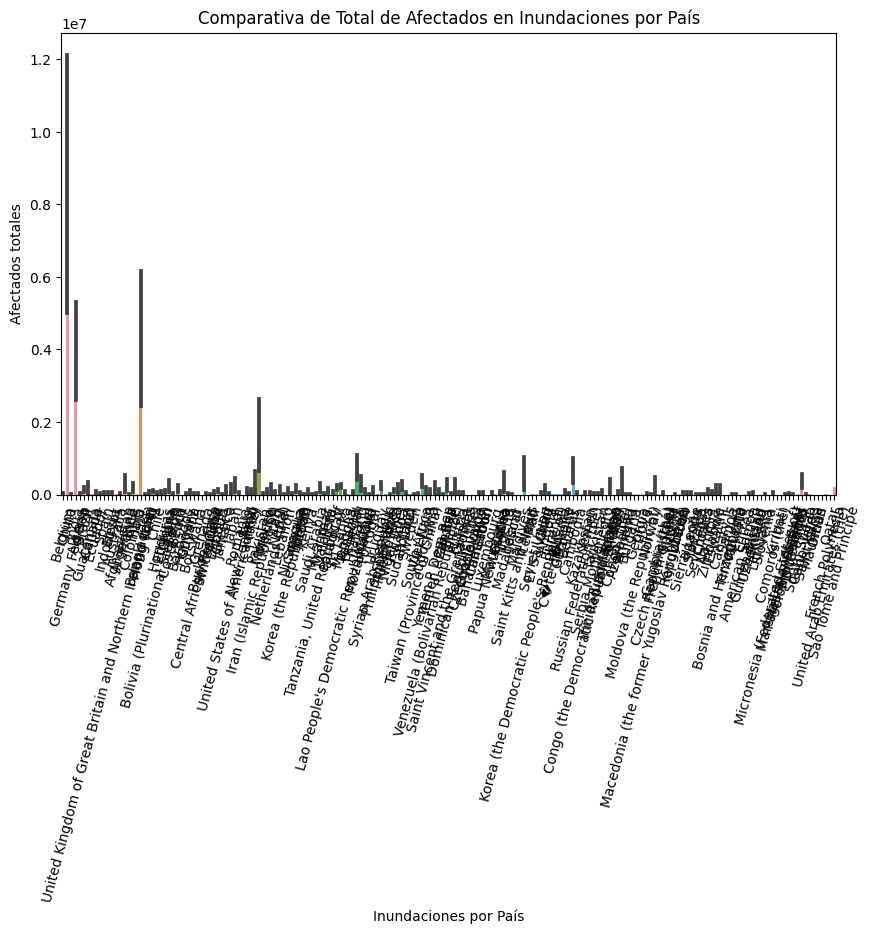

In [177]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_flood, x='Country', y='Total Affected')
plt.title('Comparativa de Total de Afectados en Inundaciones por País')
plt.xlabel('Inundaciones por País')
plt.ylabel('Afectados totales')
plt.xticks(rotation=75)
plt.show()

### DataFrames de Muertes por Continente, Región y Países

In [178]:
deaths_by_continent = df_flood.groupby('Continent')[['Total Deaths', 'Total Affected']].sum().reset_index()
# deaths_by_continent['Total Affected'] = deaths_by_continent['Total Affected'].astype(int)  # Convertir a int
deaths_by_continent

Continent  Total Deaths  Total Affected
0    Africa       34079.0    1.016998e+08
1  Americas      107586.0    1.081456e+08
2      Asia     6852022.0    3.739342e+09
3    Europe        9766.0    1.735911e+07
4   Oceania         629.0    1.643549e+06

In [179]:
deaths_by_region = df_flood.groupby('Region')['Total Deaths', 'Total Affected'].sum().reset_index()
deaths_by_region

C:\Users\AleEng\AppData\Local\Temp\ipykernel_32556\3972008501.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Region  Total Deaths  Total Affected
0   Australia and New Zealand         396.0    6.333780e+05
1                   Caribbean        6399.0    7.641682e+06
2             Central America       47948.0    1.335667e+07
3                Central Asia        1708.0    1.118723e+06
4              Eastern Africa       13657.0    4.347487e+07
5                Eastern Asia     6643416.0    2.150871e+09
6              Eastern Europe        3321.0    9.239617e+06
7                   Melanesia         227.0    1.003899e+06
8                  Micronesia           0.0    1.265000e+03
9               Middle Africa        2445.0    7.451609e+06
10            Northern Africa       10130.0    1.641971e+07
11           Northern America        3171.0    1.279845e+07
12            Northern Europe         115.0    4.613230e+05
13                  Polynesia           6.0    5.007000e+03
14         Russian Federation         148.0    1.150740e+05
15              South America       50068.0    7.434879e+07
16         South-Eastern Asia       25161.0    1.742715e+08
17            Southern Africa        2390.0    2.514102e+06
18              Southern Asia      176870.0    1.405892e+09
19            Southern Europe        3465.0    6.392821e+06
20             Western Africa        5457.0    3.183951e+07
21               Western Asia        4867.0    7.188706e+06
22             Western Europe        2717.0    1.150271e+06

In [180]:
total_deaths_by_country = df_flood.groupby('Country')['Total Deaths', 'Total Affected'].sum().reset_index()
total_deaths_by_country

C:\Users\AleEng\AppData\Local\Temp\ipykernel_32556\1477779577.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Country  Total Deaths  Total Affected
0        Afghanistan        5923.0       1895893.0
1            Albania          23.0        205670.0
2            Algeria        4895.0        809145.0
3     American Samoa           6.0             3.0
4             Angola         879.0       1337280.0
..               ...           ...             ...
185   Yemen Arab Rep         150.0        202862.0
186  Yemen P Dem Rep         507.0        705000.0
187       Yugoslavia          95.0        348000.0
188           Zambia          81.0       6083870.0
189         Zimbabwe         313.0        344022.0

[190 rows x 3 columns]

In [181]:
deaths_by_country = df_flood.groupby('Country')['Total Deaths'].value_counts()
deaths_by_country

Country      Total Deaths
Afghanistan  10.0            5
             20.0            5
             30.0            5
             11.0            3
             16.0            3
                            ..
Zimbabwe     24.0            1
             26.0            1
             36.0            1
             70.0            1
             125.0           1
Name: Total Deaths, Length: 2666, dtype: int64

In [182]:
affected_by_country = df_flood.groupby('Country')['Total Affected'].value_counts()
affected_by_country

Country      Total Affected
Afghanistan  2500.0            3
             4000.0            3
             20.0              2
             100.0             2
             500.0             2
                              ..
Zimbabwe     9700.0            1
             15000.0           1
             18000.0           1
             30000.0           1
             266000.0          1
Name: Total Affected, Length: 4221, dtype: int64

# Visualizaciones

In [183]:
df_flood.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

## Heatmaps

### Segmentación de correlaciones: por tipo, geográfica y temporal

In [184]:
df_flood_corr_type = df_flood[['Disaster Subtype', 'Associated Dis']]
df_flood_corr_geo = df_flood[['Continent', 'Region', 'Country', 'Location', 'Origin']]
df_flood_corr_temp = df_flood[['Start Day', 'End Day', 'Start Month', 'End Month', 'Start Year', 'End Year']]
df_flood_corr_magn = df_flood[['Dis Mag Value', 'Dis Mag Scale']]
df_flood_corr_geoloc = df_flood[['Latitude', 'Longitude']]

C:\Users\AleEng\AppData\Local\Temp\ipykernel_32556\910190916.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



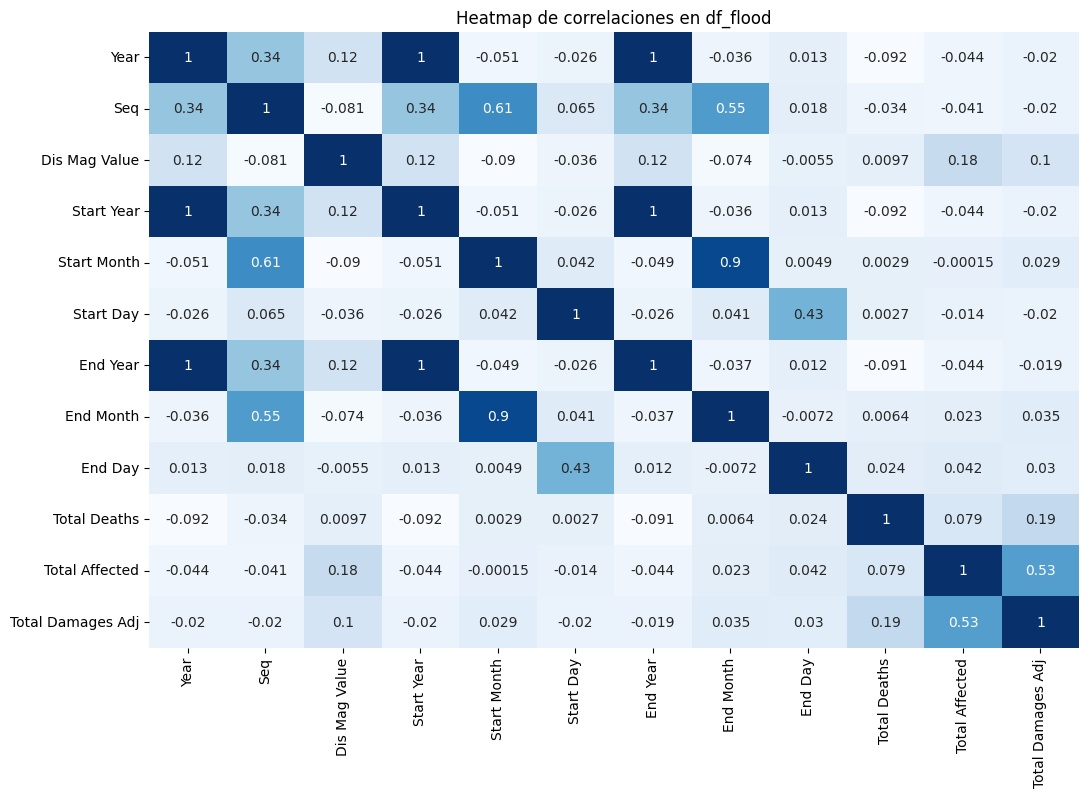

In [185]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_flood.corr(), annot=True, cmap='Blues', cbar=False)
plt.title('Heatmap de correlaciones en df_flood')
plt.show()

### Correlaciones por tipo de desastre

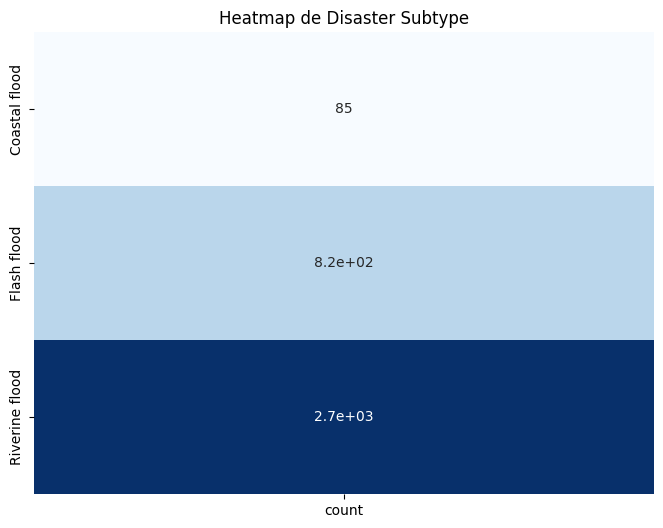

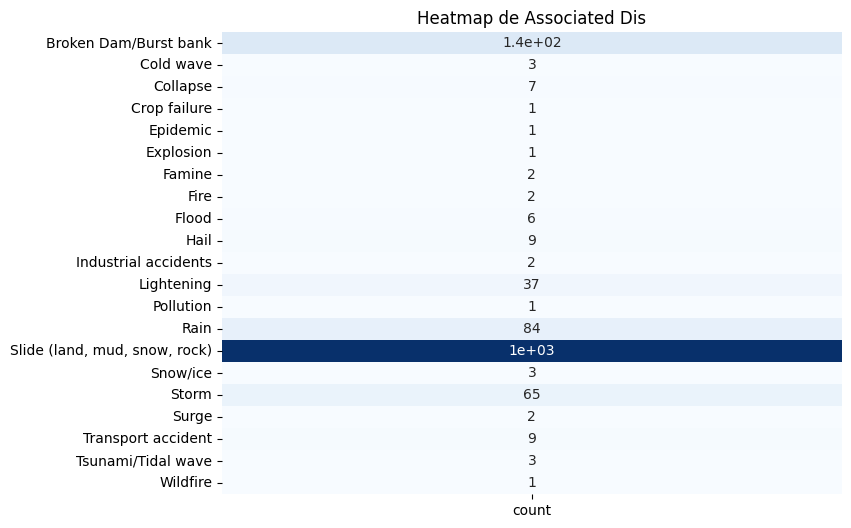

In [186]:
for column in df_flood_corr_type:
    crosstab = pd.crosstab(df_flood_corr_type[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Correlaciones geográficas

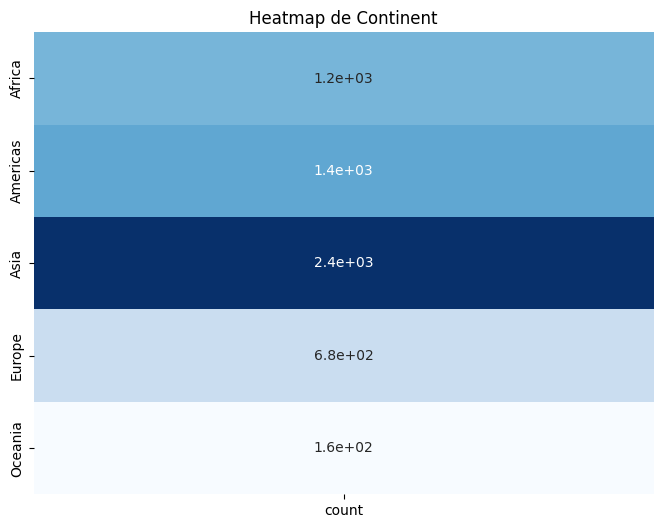

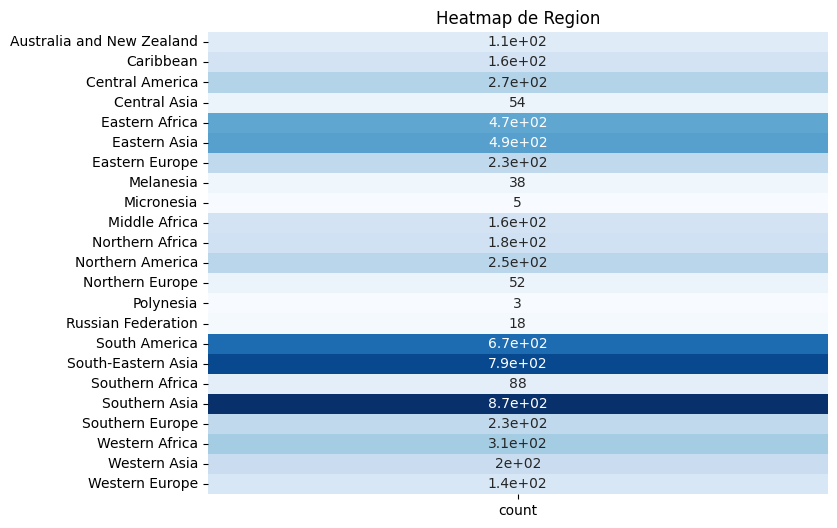

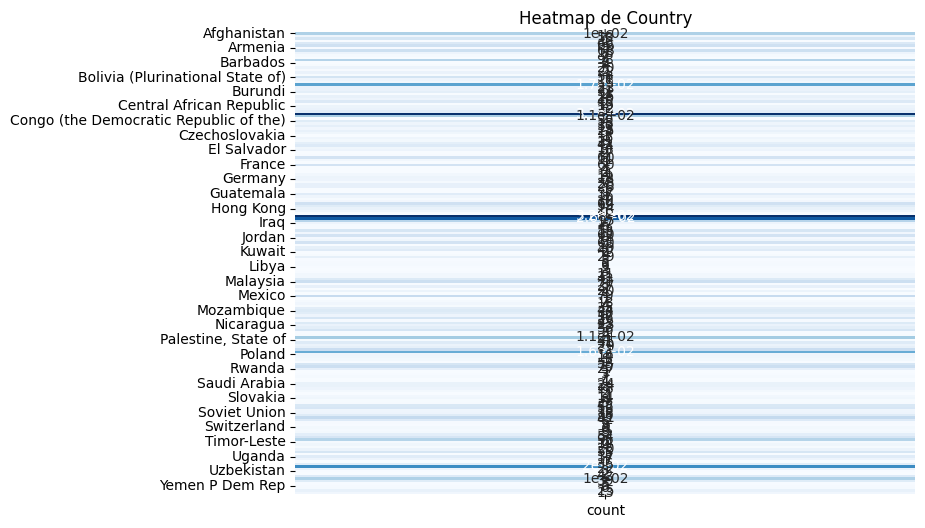

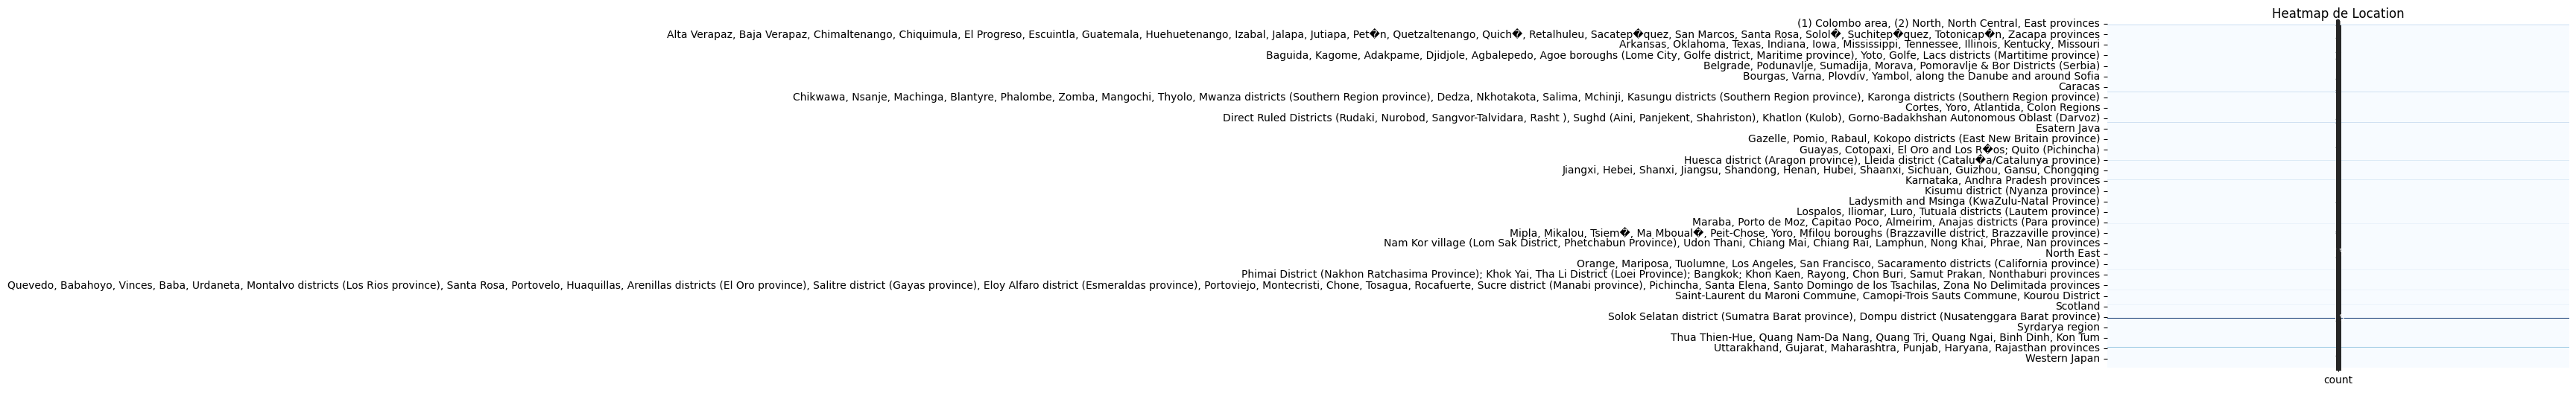

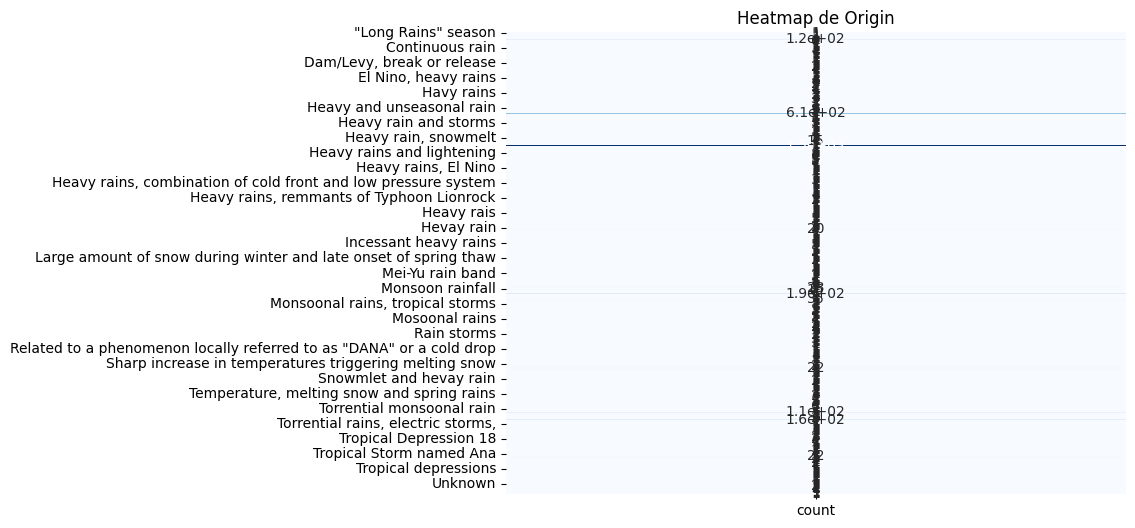

In [187]:
for column in df_flood_corr_geo:
    crosstab = pd.crosstab(df_flood_corr_geo[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Correlaciones temporales

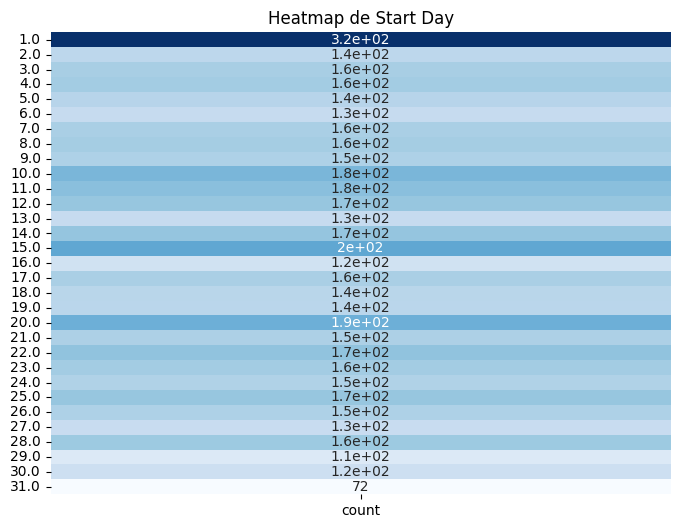

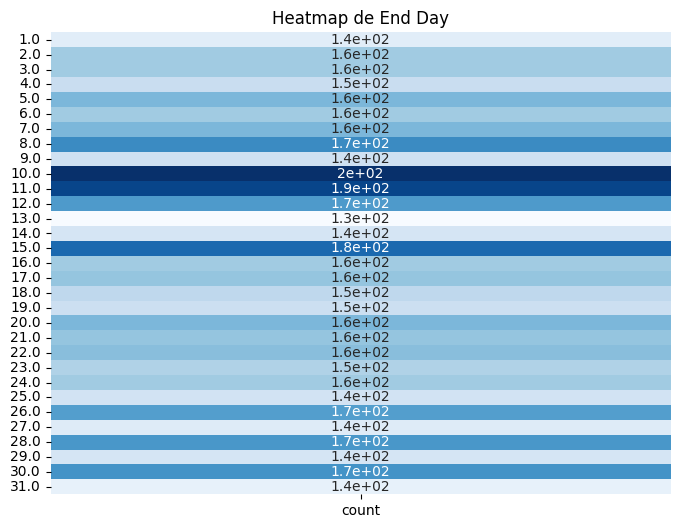

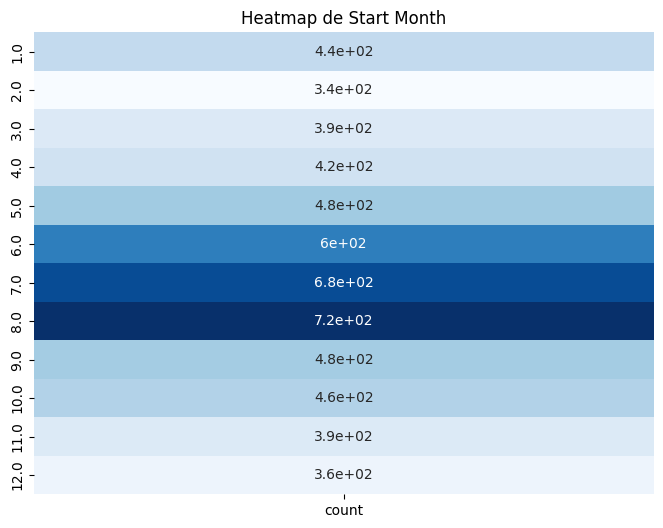

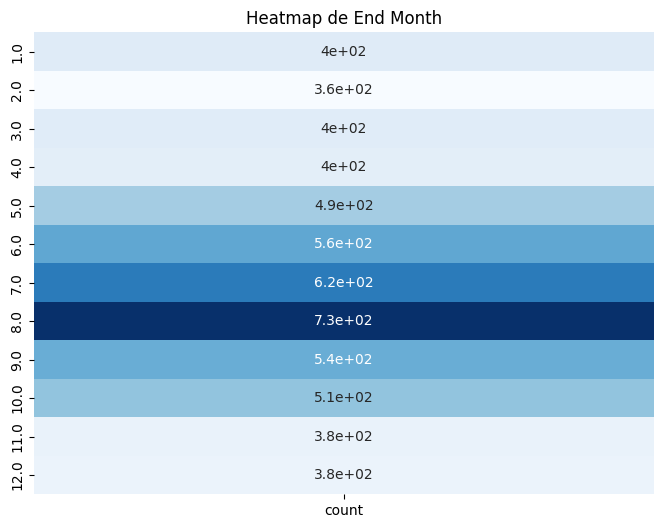

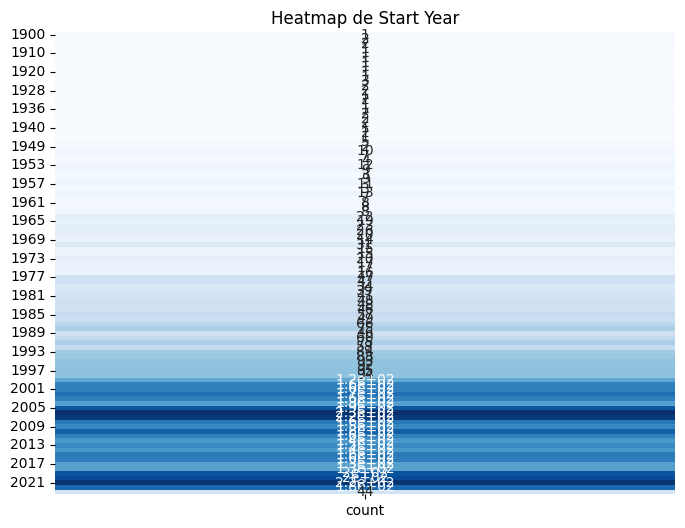

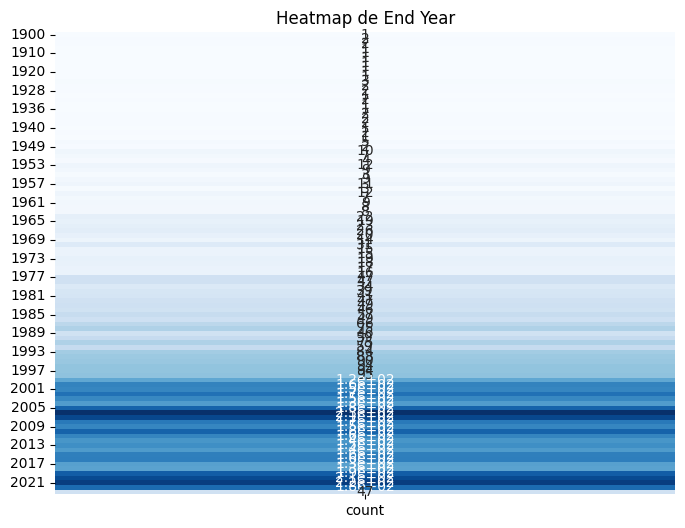

In [188]:
for column in df_flood_corr_temp:
    crosstab = pd.crosstab(df_flood_corr_temp[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [189]:
origin_stats = df_flood.groupby('Origin').agg({
    'Disaster Subtype': 'count',  # Total de inundaciones
    'Total Deaths': 'sum',
    'Total Affected': 'sum'
}).reset_index()

# Ordenar por Total Deaths
origin_stats = origin_stats.sort_values('Total Deaths', ascending=False, inplace=True)
origin_stats

# Pivot Tables

## Profundización de Análisis de Impacto Geográfico con Pivot Tables

In [190]:
impact_order = ['Total Deaths', 'Total Affected', 'Total Damages Adj']

### Impacto por subtipo de desastre

#### Por país

In [191]:
df_flood_impact_country = df_flood.dropna(subset=['Country', 'Total Deaths', 'Total Affected', 'Total Damages Adj'])
df_flood_impact_country_pivot = df_flood_impact_country.pivot_table(
    index='Country',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)
df_flood_impact_country_pivot

Total Affected                            Total Damages Adj  \
Disaster Subtype  Coastal flood Flash flood Riverine flood     Coastal flood   
Country                                                                        
Afghanistan                   0       14035         168416                 0   
Albania                       0       56002          66884                 0   
Algeria                       0       59050         110775                 0   
American Samoa                0           3              0                 0   
Angola                        0       30250          70000                 0   
...                         ...         ...            ...               ...   
Viet Nam                4292316     1034938       17444981           1144791   
Yemen                         0      198223         264710                 0   
Yemen P Dem Rep               0      350000         340000                 0   
Yugoslavia                    0           0          95000                 0   
Zimbabwe                      0        1002         284000                 0   

                                             Total Deaths              \
Disaster Subtype Flash flood Riverine flood Coastal flood Flash flood   
Country                                                                 
Afghanistan            12052         156213             0         531   
Albania                25226          28472             0          12   
Algeria               473027        1515407             0          93   
American Samoa         79544              0             0           6   
Angola                  2388          16995             0          11   
...                      ...            ...           ...         ...   
Viet Nam              780089        4487829           803         511   
Yemen                 566325        2260688             0         102   
Yemen P Dem Rep      2956875          77905             0         482   
Yugoslavia                 0        3222996             0           0   
Zimbabwe               24724         442069             0           3   

                                 
Disaster Subtype Riverine flood  
Country                          
Afghanistan                 454  
Albania                       1  
Algeria                     982  
American Samoa                0  
Angola                       31  
...                         ...  
Viet Nam                   2946  
Yemen                       376  
Yemen P Dem Rep              25  
Yugoslavia                    3  
Zimbabwe                     72  

[128 rows x 9 columns]

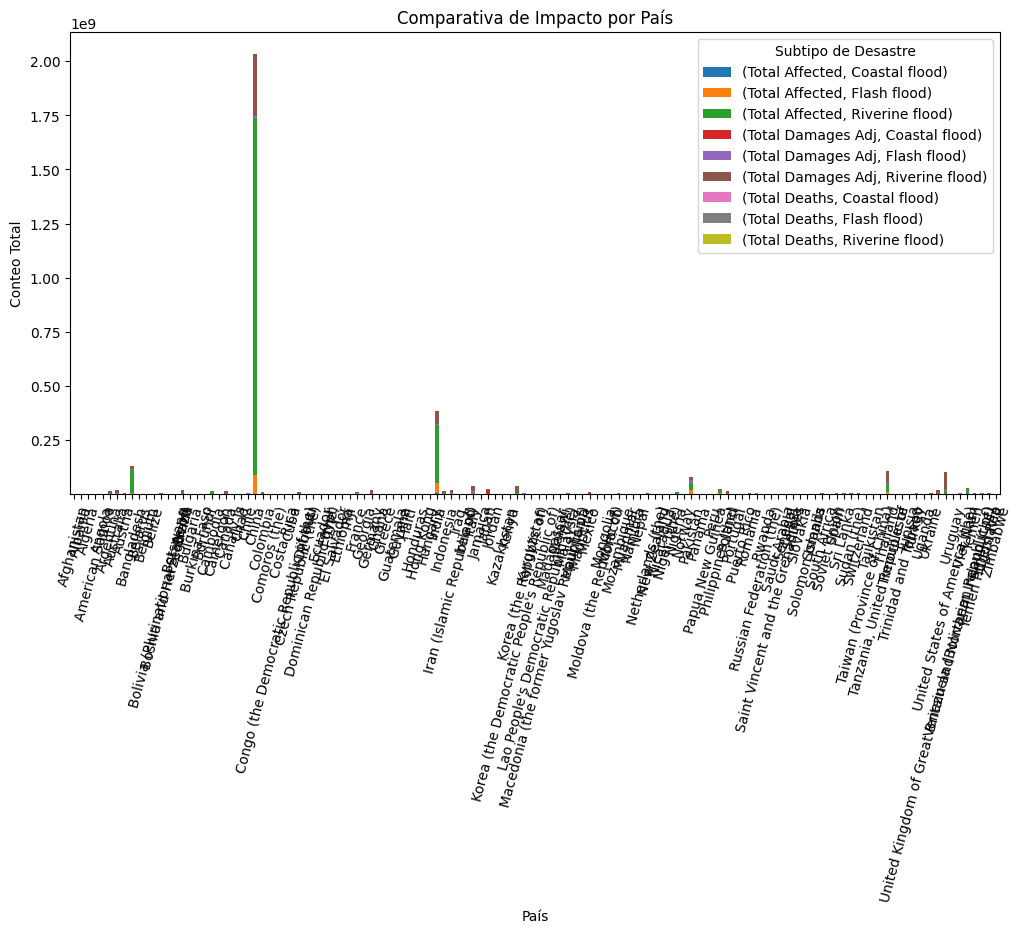

In [192]:
df_flood_impact_country_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Comparativa de Impacto por País')
plt.xlabel('País')
plt.ylabel('Conteo Total')
plt.legend(title='Subtipo de Desastre')
plt.xticks(rotation=75)
plt.show()


#### Por Location

In [194]:
df_flood_impact_location = df_flood.dropna(subset=['Location', 'Total Deaths', 'Total Affected', 'Total Damages Adj'])
df_flood_impact_location_pivot = df_flood_impact_location.pivot_table(
    index='Location',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)
df_flood_impact_location_pivot

Total Affected              \
Disaster Subtype                                    Coastal flood Flash flood   
Location                                                                        
(1) Rajasthan, Gujarat - (2) North-East, West B...              0     7500000   
ARMM province (Maguindanao, Shariff Kabunsuan, ...              0      505102   
Abkhazia region                                                 0           0   
Accra                                                           0           0   
Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naga...              0           0   
...                                                           ...         ...   
Zhejiang Province (including Wenzhou, Taizhou a...              0     5165000   
Zhenxiong Xian area (Zhaotong district, Yunnan ...              0           0   
Zonguldak, Karabuk, Bartin, Sakarya                             0     1240047   
city of Durban (Kwazulu-Natal Province)                         0         300   
governorates of Tunis and part of Nabeul                        0       30000   

                                                                   \
Disaster Subtype                                   Riverine flood   
Location                                                            
(1) Rajasthan, Gujarat - (2) North-East, West B...              0   
ARMM province (Maguindanao, Shariff Kabunsuan, ...              0   
Abkhazia region                                               300   
Accra                                                      700000   
Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naga...          87000   
...                                                           ...   
Zhejiang Province (including Wenzhou, Taizhou a...              0   
Zhenxiong Xian area (Zhaotong district, Yunnan ...          10009   
Zonguldak, Karabuk, Bartin, Sakarya                             0   
city of Durban (Kwazulu-Natal Province)                         0   
governorates of Tunis and part of Nabeul                        0   

                                                   Total Damages Adj  \
Disaster Subtype                                       Coastal flood   
Location                                                               
(1) Rajasthan, Gujarat - (2) North-East, West B...                 0   
ARMM province (Maguindanao, Shariff Kabunsuan, ...                 0   
Abkhazia region                                                    0   
Accra                                                              0   
Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naga...                 0   
...                                                              ...   
Zhejiang Province (including Wenzhou, Taizhou a...                 0   
Zhenxiong Xian area (Zhaotong district, Yunnan ...                 0   
Zonguldak, Karabuk, Bartin, Sakarya                                0   
city of Durban (Kwazulu-Natal Province)                            0   
governorates of Tunis and part of Nabeul                           0   

                                                                               \
Disaster Subtype                                   Flash flood Riverine flood   
Location                                                                        
(1) Rajasthan, Gujarat - (2) North-East, West B...      792566              0   
ARMM province (Maguindanao, Shariff Kabunsuan, ...       31320              0   
Abkhazia region                                              0           4225   
Accra                                                        0          24006   
Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naga...           0           2603   
...                                                        ...            ...   
Zhejiang Province (including Wenzhou, Taizhou a...     1136711              0   
Zhenxiong Xian area (Zhaotong district, Yunnan ...           0          15969   
Zonguldak, Karabuk, Bartin, Sakarya              

#### Por Origin

In [197]:
df_flood_impact_origin = df_flood.dropna(subset=['Origin', 'Total Deaths', 'Total Affected', 'Total Damages Adj'])

In [198]:
df_flood_impact_origin_pivot = df_flood_impact_origin.pivot_table(
    index='Origin',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)
df_flood_impact_origin_pivot

Total Affected                             \
Disaster Subtype                   Coastal flood Flash flood Riverine flood   
Origin                                                                        
Abundant snowmelt and heavy rains              0           0          16000   
Breif torrential rain                          0      483635              0   
Brief torrential rain                          0    14922324         111667   
Brief torrential rains                         0         536              0   
Continous rainfall                             0           0         201472   
...                                          ...         ...            ...   
Typhoon Bolaven                                0           0         210000   
Typhoon Peipah                            150000           0              0   
Unseasonable summer storms                     0        2500              0   
Violent thunderstorms                          0           0            600   
continuous rain                                0           0         213000   

                                  Total Damages Adj              \
Disaster Subtype                      Coastal flood Flash flood   
Origin                                                            
Abundant snowmelt and heavy rains                 0           0   
Breif torrential rain                             0     5551789   
Brief torrential rain                             0    29324263   
Brief torrential rains                            0     1237450   
Continous rainfall                                0           0   
...                                             ...         ...   
Typhoon Bolaven                                   0           0   
Typhoon Peipah                               494010           0   
Unseasonable summer storms                        0      309879   
Violent thunderstorms                             0           0   
continuous rain                                   0           0   

                                                  Total Deaths              \
Disaster Subtype                  Riverine flood Coastal flood Flash flood   
Origin                                                                       
Abundant snowmelt and heavy rains          87170             0           0   
Breif torrential rain                          0             0       30000   
Brief torrential rain                    1296316             0        4420   
Brief torrential rains                         0             0         108   
Continous rainfall                         96026             0           0   
...                                          ...           ...         ...   
Typhoon Bolaven                           390047             0           0   
Typhoon Peipah                                 0            55           0   
Unseasonable summer storms                     0             0           2   
Violent thunderstorms                       2513             0           0   
continuous rain                             7763             0           0   

                                                  
Disaster Subtype                  Riverine flood  
Origin                                            
Abundant snowmelt and heavy rains              2  
Breif torrential rain                          0  
Brief torrential rain                         59  
Brief torrential rains                         0  
Continous rainfall                            18  
...                                          ...  
Typhoon Bolaven                               15  
Typhoon Peipah                                 0  
Unseasonable summer storms                     0  
Violent thunderstorms                         19  
continuous rain                               17  

[139 rows x 9 columns]

## Profundización de Análisis de Impacto Temporal con Pivot Tables

#### Por Año

In [233]:
df_flood_impact_year = df_flood.dropna(subset=['Year', 'Total Deaths', 'Total Affected', 'Total Damages Adj'])
df_flood_impact_year_pivot = df_flood_impact_year.pivot_table(
    index='Year',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)

df_flood_impact_year_pivot

Total Affected                            Total Damages Adj  \
Disaster Subtype  Coastal flood Flash flood Riverine flood     Coastal flood   
Year                                                                           
1953                     300000           0              0           3274160   
1986                          0           0          40000                 0   
1988                          0         300              0                 0   
1989                          0           0         501000                 0   
1990                          0         236       28942665                 0   
1991                          0      701840      216453342                 0   
1992                          0       43433        7978186                 0   
1993                          0      989349        1572134                 0   
1994                          0           0      114760223                 0   
1995                          0       28985      159705380                 0   
1996                          0       20957      173932381                 0   
1997                          0           0        2811100                 0   
1998                      26375     1439377      257423294           1371637   
1999                    4227577     8595317      103374588           1210149   
2000                     360110      862484       55345194          12644320   
2001                     849326     3163917       14429837            114043   
2002                          0    80405922       46767443                 0   
2003                     286777      828353      159916034            118711   
2004                          0       31175       78414896                 0   
2005                          0     1002363       65174829                 0   
2006                          0      831517       13196470                 0   
2007                    7782593     2626150       21657274           1069207   
2008                          0     8935881       14325428                 0   
2009                          0      540122       45192569                 0   
2010                          0    23186109      153206579                 0   
2011                          0      872849      116087235                 0   
2012                          0      100018       48696454                 0   
2013                          0          82       23998522                 0   
2014                          0      800968       29599161                 0   
2015                          0       64259        4037511                 0   
2016                          0     2264001        3327110                 0   
2017                          0       80642        1911158                 0   
2018                          0    23399914         700000                 0   
2019                          0       60040          11900                 0   
2020                          0      958974          22067                 0   
2021                          0     1929299          12051                 0   
2022                          0      628992              0                 0   

                                             Total Deaths              \
Disaster Subtype Flash flood Riverine flood Coastal flood Flash flood   
Year                                                                    
1953                       0              0          2000           0   
1986                       0        4167878             0           0   
1988                 1237354              0             0          10   
1989                       0          82626             0           0   
1990                      96        4049655             0          98   
1991                  169758       18689585             0         529   
1992                  773786        4479923             0         531   
1993                 3090212       28747284             0         502   
1994         

#### Impacto de Inundaciones por Año

C:\Users\AleEng\AppData\Local\Temp\ipykernel_32556\259844694.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



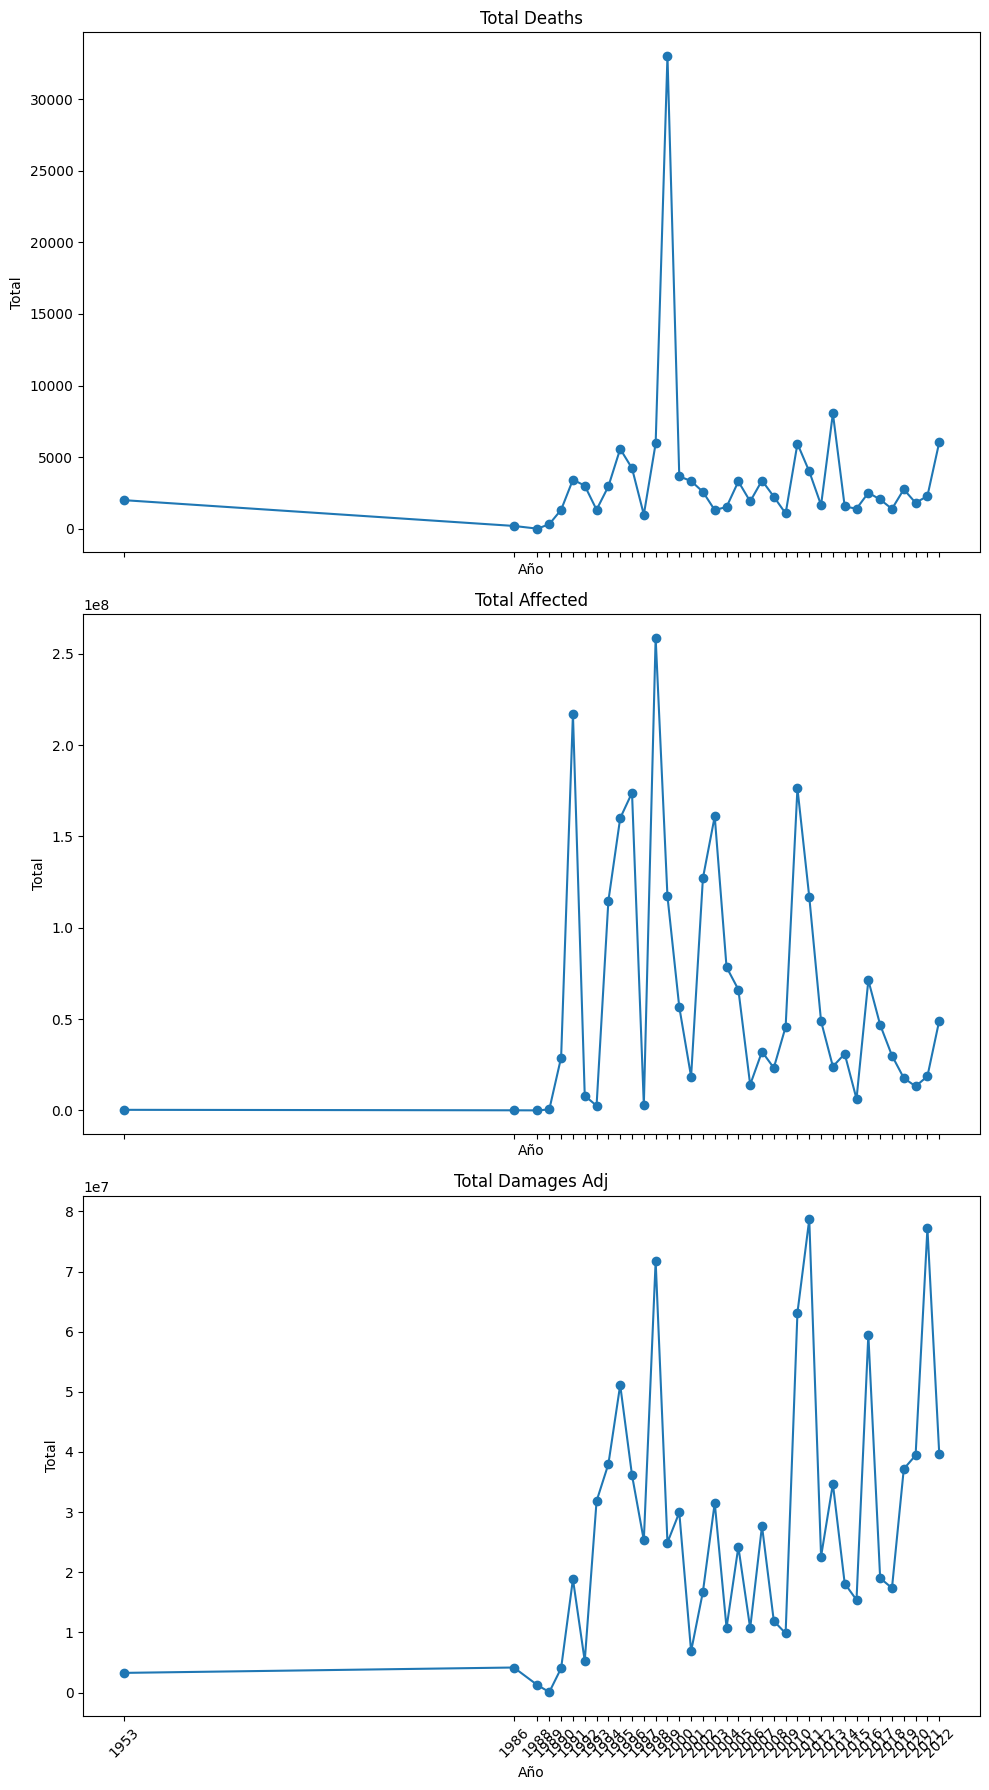

In [249]:
# # Agrupar por año y calcular la suma de indicadores de impacto
df_floodimpact_year = df_flood.groupby('Year')['Total Deaths', 'Total Affected', 'Total Damages Adj'].sum().reset_index()

# # Plot de análisis temporal para cada indicador de impacto
impact_indicators = ['Total Deaths', 'Total Affected', 'Total Damages Adj']
num_impact = len(impact_indicators)

fig, axes = plt.subplots(num_indicators, figsize=(10, 6*num_indicators), sharex=True)

for i, indicator in enumerate(impact_indicators):
    ax = axes[i]
    ax.plot(df_floodimpact_year['Year'], df_floodimpact_year[indicator], marker='o')
    ax.set_title(indicator)
    ax.set_xlabel('Año')
    ax.set_ylabel('Total')
    ax.set_xticks(df_floodimpact_year['Year'])
    ax.set_xticklabels(df_floodimpact_year['Year'], rotation=45)

plt.tight_layout()
plt.show()

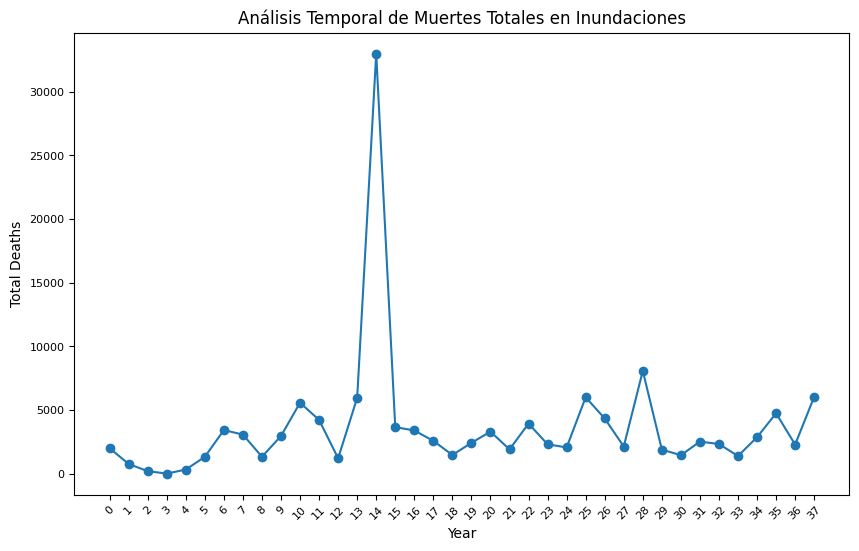

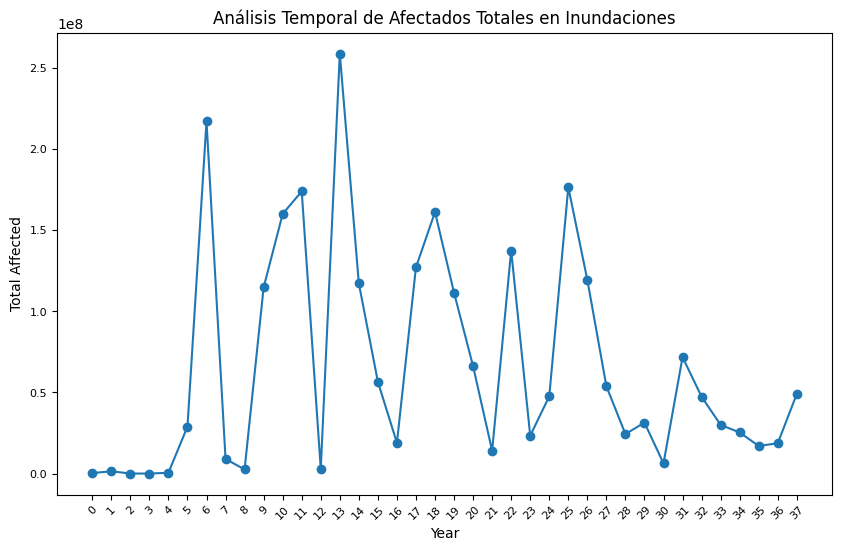

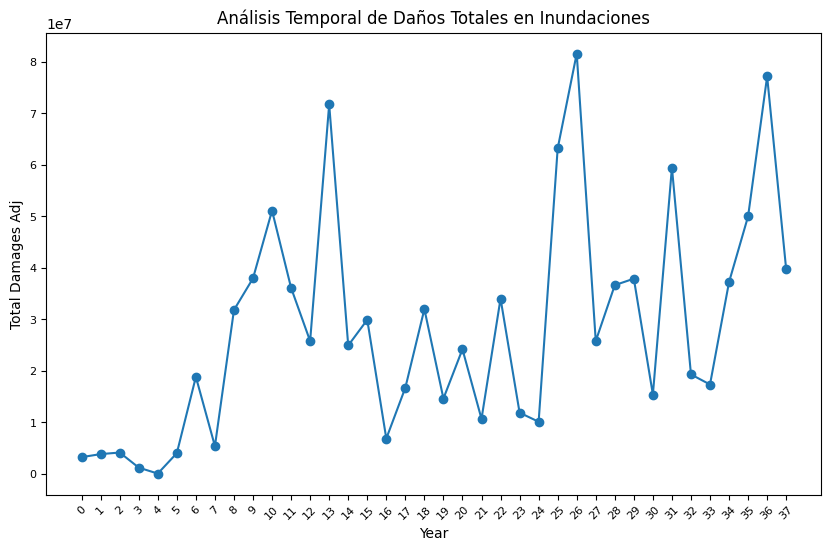

In [234]:
# Análisis Temporal de Muertes Totales
plt.figure(figsize=(10, 6))
plt.plot(df_floodimpact_year.index, df_floodimpact_year['Total Deaths'], marker='o')
plt.title('Análisis Temporal de Muertes Totales en Inundaciones')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(df_floodimpact_year.index, rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Análisis Temporal de Total de Afectados
plt.figure(figsize=(10, 6))
plt.plot(df_floodimpact_year.index, df_floodimpact_year['Total Affected'], marker='o')
plt.title('Análisis Temporal de Afectados Totales en Inundaciones')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.xticks(df_floodimpact_year.index, rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Análisis Temporal de Daños Totales
plt.figure(figsize=(10, 6))
plt.plot(df_floodimpact_year.index, df_floodimpact_year['Total Damages Adj'], marker='o')
plt.title('Análisis Temporal de Daños Totales en Inundaciones')
plt.xlabel('Year')
plt.ylabel('Total Damages Adj')
plt.xticks(df_floodimpact_year.index, rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()


#### Análisis de Años y las Muertes Totales por Inundaciones

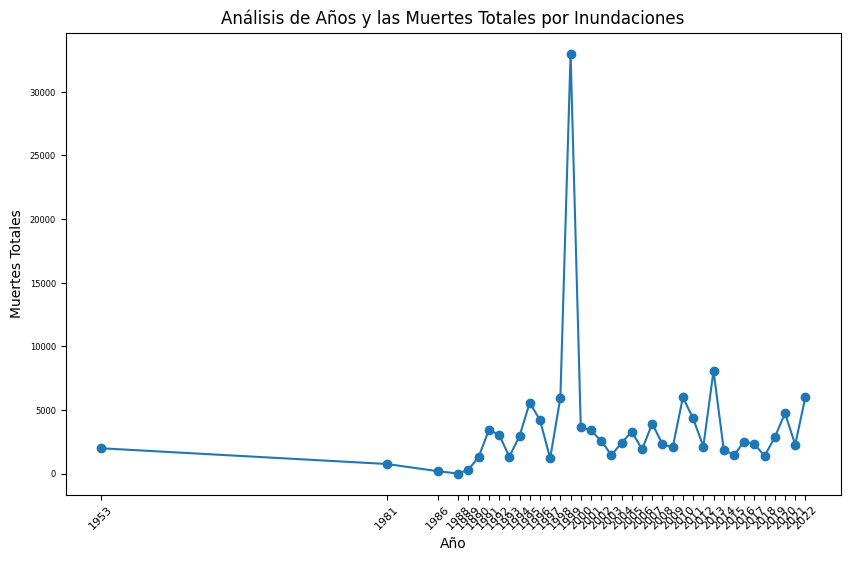

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(df_floodimpact_year['Year'], df_floodimpact_year['Total Deaths'], marker='o')
plt.title('Análisis de Años y las Muertes Totales por Inundaciones')
plt.xlabel('Año')
plt.ylabel('Muertes Totales')
plt.xticks(df_floodimpact_year['Year'], rotation=45, fontsize=8)
plt.yticks(fontsize=6)
plt.show()

#### Análisis de Años y los Afectados Totales por Inundaciones

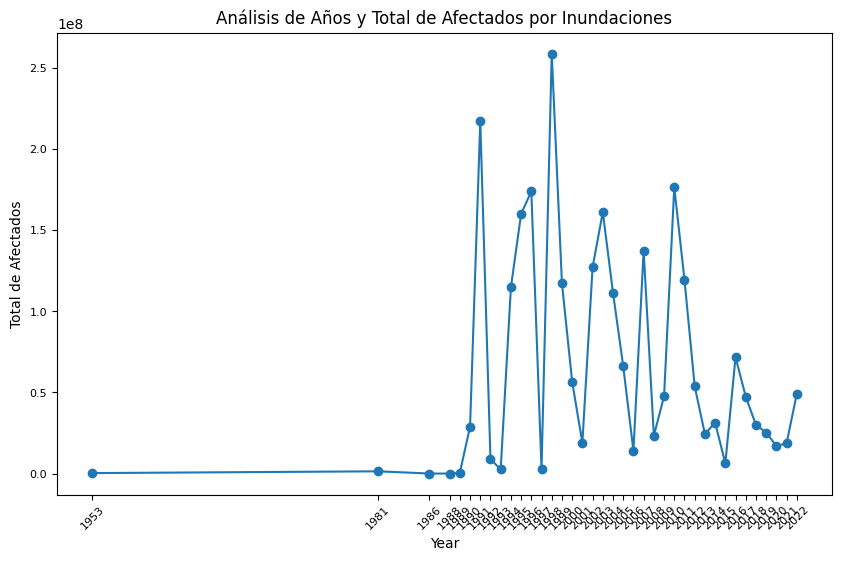

In [237]:
plt.figure(figsize=(10, 6))
plt.plot(df_floodimpact_year['Year'], df_floodimpact_year['Total Affected'], marker='o')
plt.title('Análisis de Años y Total de Afectados por Inundaciones')
plt.xlabel('Year')
plt.ylabel('Total de Afectados')
plt.xticks(df_floodimpact_year['Year'], rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

#### Análisis de Años y los Daños Totales por Inundaciones

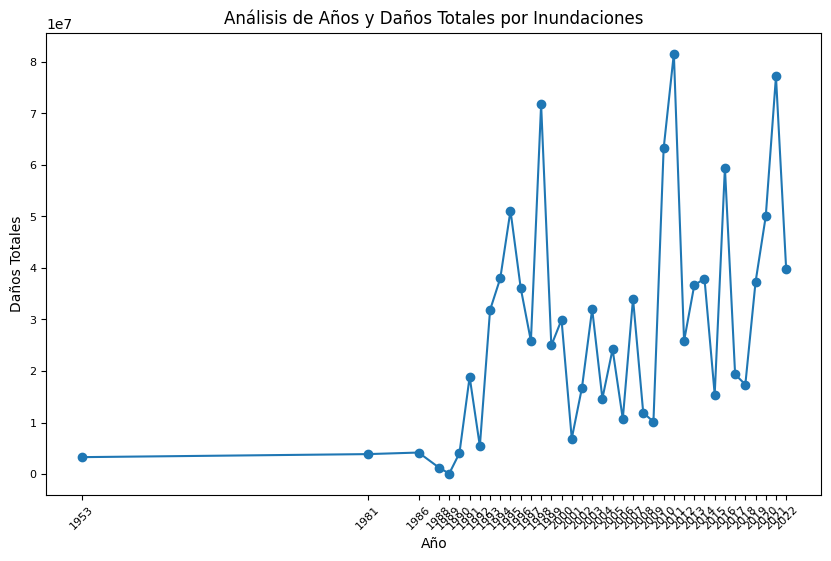

In [238]:
plt.figure(figsize=(10, 6))
plt.plot(df_floodimpact_year['Year'], df_floodimpact_year['Total Damages Adj'], marker='o')
plt.title('Análisis de Años y Daños Totales por Inundaciones')
plt.xlabel('Año')
plt.ylabel('Daños Totales')
plt.xticks(df_floodimpact_year['Year'], rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Se cuentan 37 años con los diferentes impactos.

### Duración de las Inundaciones por Días

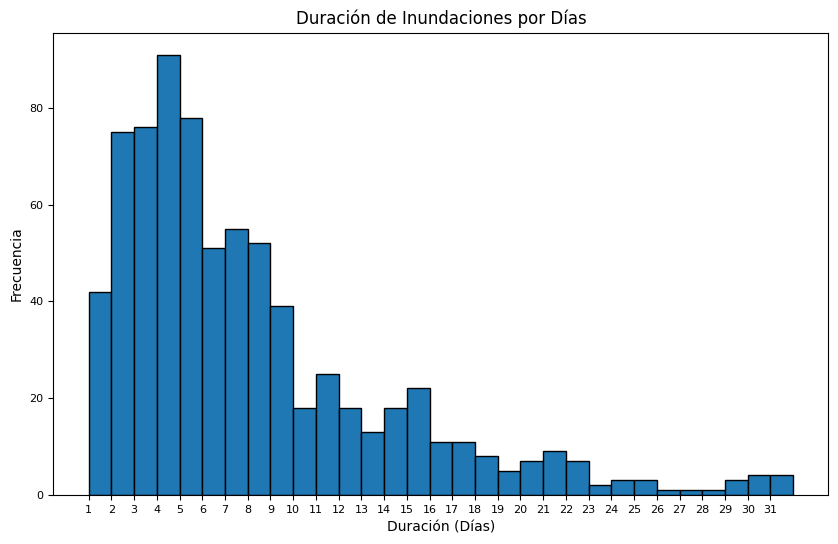

In [248]:
# Calcular la duración para cada evento de inundación
df_flood['Duration'] = df_flood['End Day'] - df_flood['Start Day'] + 1

# Filtrar valores no-finitos en la columna 'Duration'
df_flood = df_flood[np.isfinite(df_flood['Duration'])]

# Convertir columna 'Duration' a integers
df_flood['Duration'] = df_flood['Duration'].astype(int)

# Histograma del análisis temporal de duración de inundaciones
plt.figure(figsize=(10, 6))
plt.hist(df_flood['Duration'], bins=range(1, df_flood['Duration'].max() + 2), edgecolor='black')
plt.title('Duración de Inundaciones por Días')
plt.xlabel('Duración (Días)')
plt.ylabel('Frecuencia')

# Añadir xticks con años
plt.xticks(range(1, df_flood['Duration'].max() + 1), fontsize=8)
plt.yticks(fontsize=8)

plt.show()


La mayoría de las inundaciones dura máximo de 4 días, de ahí, puede variar entre 2, 3 y 5 días. A lo largo de un mes, la tendencia es que la frecuencia se reduzca, siendo menos probables las inundaciones de esta duración.

#### Por Mes

In [240]:
df_flood_impact_startmonth = df_flood.dropna(subset=['Start Month', 'End Month', 'Disaster Subtype', 'Total Deaths', 'Total Affected', 'Total Damages Adj'], inplace=False)
df_flood_impact_startmonth.isna().sum()

df_flood_impact_startmonth_pivot = df_flood_impact_startmonth.pivot_table(
    index='Start Month',
    columns='Disaster Subtype',
    values=['Total Deaths', 'Total Affected', 'Total Damages Adj'],
    aggfunc='sum',
    fill_value=0
)

df_flood_impact_startmonth_pivot

Total Affected                            Total Damages Adj  \
Disaster Subtype  Coastal flood Flash flood Riverine flood     Coastal flood   
Start Month                                                                    
1.0                      850701      725217       13354199           3623249   
2.0                           0      119182       10547649                 0   
3.0                           0     1344986        2424256                 0   
4.0                           0      513643       19318709                 0   
5.0                           0     6011104      265232076                 0   
6.0                           0    88640987      947934727                 0   
7.0                      300000    26831072      458082720             54542   
8.0                      416130    26100535       86483168            183489   
9.0                     8308275     5559639      132460384          14908285   
10.0                    3726186     3205092       18027031            467292   
11.0                     231466     3402491        5031973            565370   
12.0                          0     2939877        4627123                 0   

                                             Total Deaths              \
Disaster Subtype Flash flood Riverine flood Coastal flood Flash flood   
Start Month                                                             
1.0                   968939       24285418          2083         193   
2.0                   376480       10400405             0         282   
3.0                  1268996       14476256             0         968   
4.0                  2498217       13848340             0         299   
5.0                  5879872       61595954             0         965   
6.0                  9320070      157200347             0        2857   
7.0                 21678192      138914322            11        3535   
8.0                  6371198      121119288            74        2072   
9.0                  3926707       29620596          1019        1124   
10.0                19351610       14424935           674        1685   
11.0                 4448053       32700697            75         272   
12.0                 9918917       18893534             0       30478   

                                 
Disaster Subtype Riverine flood  
Start Month                      
1.0                        3522  
2.0                        2130  
3.0                         901  
4.0                        1467  
5.0                        4336  
6.0                       18097  
7.0                       12920  
8.0                        7838  
9.0                        7960  
10.0                       1751  
11.0                       2710  
12.0                        723

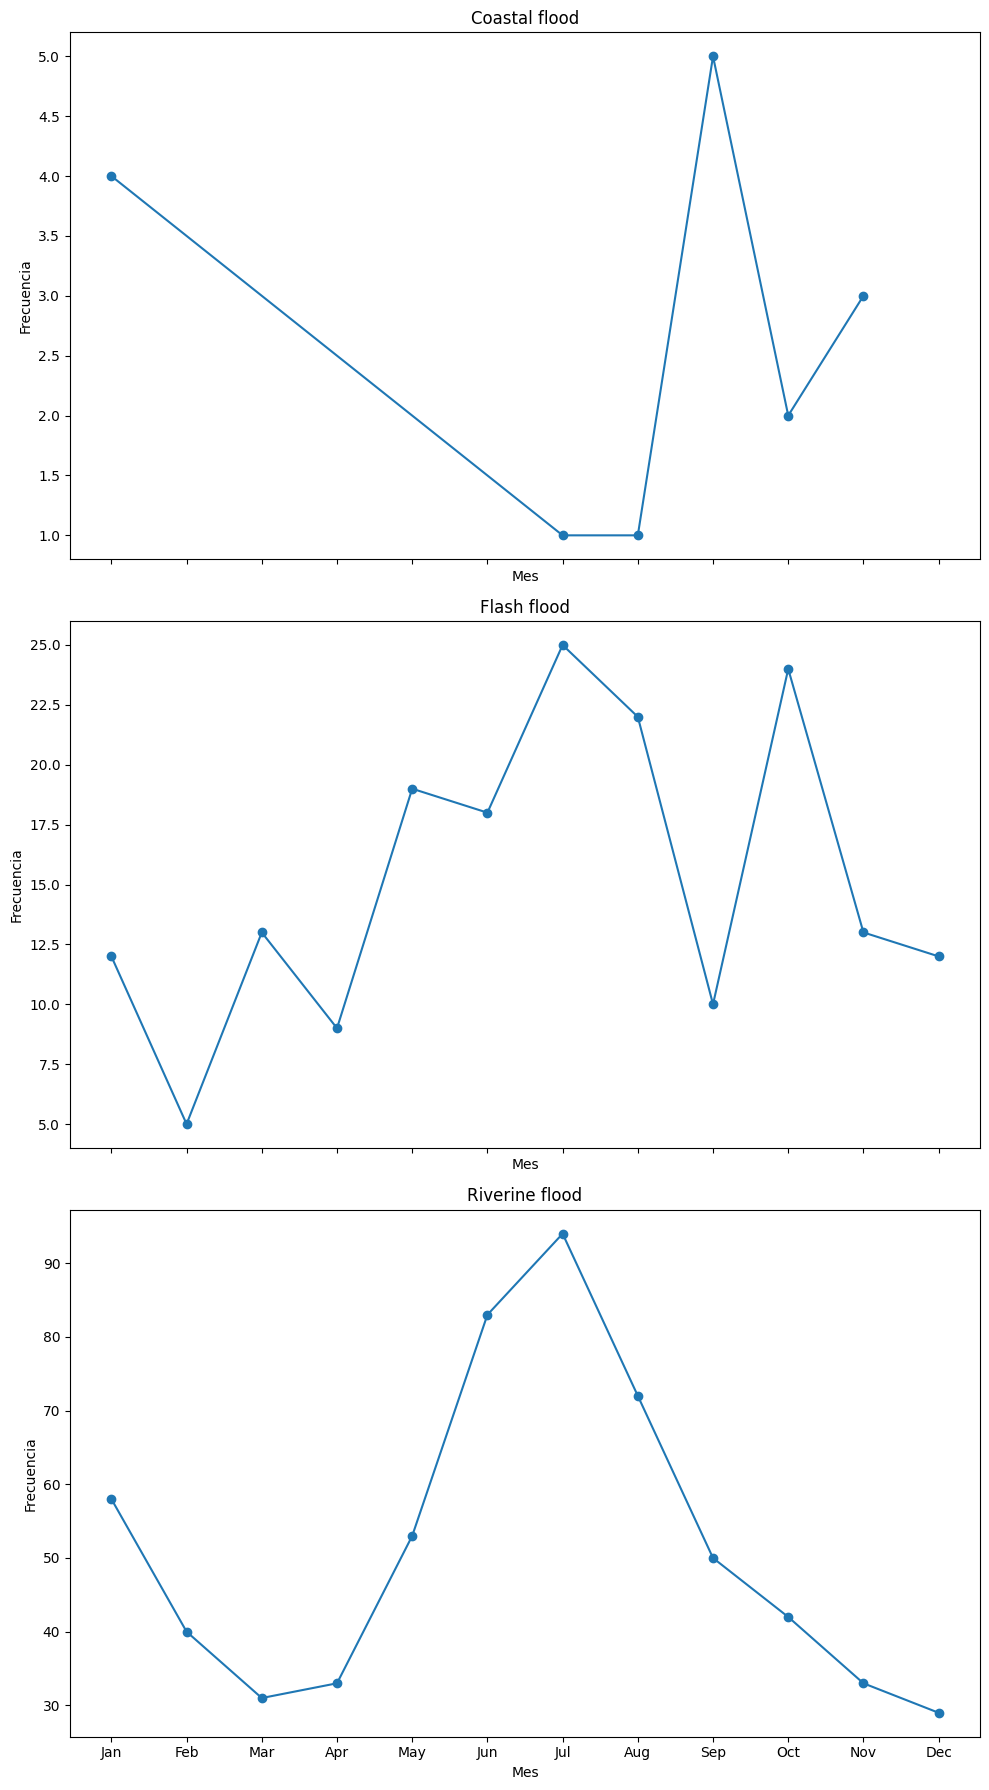

In [242]:
# Agrupar por subtipo de inundación y mes
df_flood_startmonth = df_flood.groupby(['Disaster Subtype', 'Start Month']).size().reset_index(name='Count')

# Plot para cada subtipo de inundación
subtypes = df_flood_startmonth['Disaster Subtype'].unique()
num_subtypes = len(subtypes)

fig, axes = plt.subplots(num_subtypes, figsize=(10, 6*num_subtypes), sharex=True)

for i, subtype in enumerate(subtypes):
    data = df_flood_startmonth[df_flood_startmonth['Disaster Subtype'] == subtype]
    ax = axes[i]
    ax.plot(data['Start Month'], data['Count'], marker='o')
    ax.set_title(subtype)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Frecuencia')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


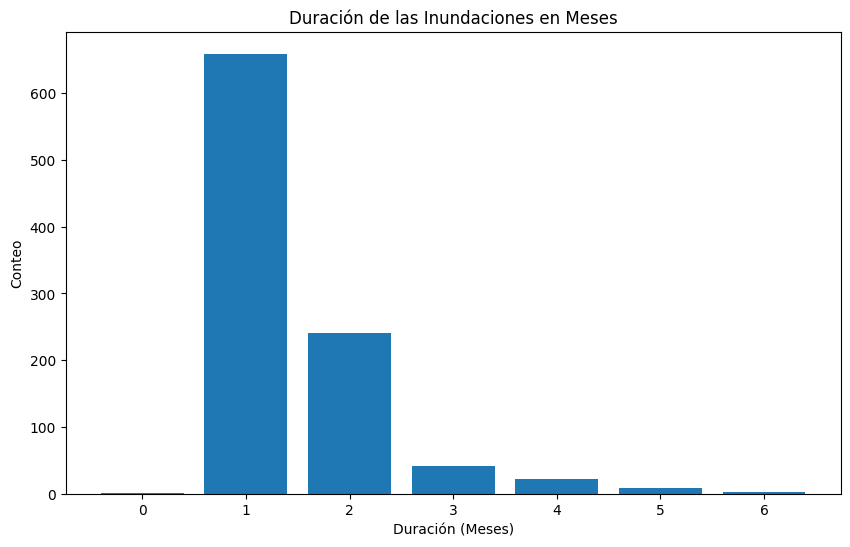

In [244]:
# Calcular la duración de las inundaciones por meses
df_flood['Duration (Months)'] = (df_flood['End Month'] - df_flood['Start Month'] + 1) % 12

# Agrupar por duración y calcular el conteo para cada duración
duration_counts = df_flood['Duration (Months)'].value_counts().sort_index()

# Plot de la duración
plt.figure(figsize=(10, 6))
plt.bar(duration_counts.index, duration_counts.values)
plt.title('Duración de las Inundaciones en Meses')
plt.xlabel('Duración (Meses)')
plt.ylabel('Conteo')
plt.xticks(duration_counts.index)
plt.show()


La mayoría de las inundaciones tiene duración de 1 mes, seguida en casi un tercio de las veces por 2 meses. A partir de ahí, la duración disminuye considerablemente entre 3 hasta 6 meses.

# Diagrama Sankey para Flujo de Subtipos de Inundaciones

In [247]:
import plotly.graph_objects as go

# Agrupar por columnas relevantes y calcular los conteos
df_sankey = df_flood.groupby(['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region']).size().reset_index(name='Count')

# Crear las etiquetas de nodos para el diagrama Sankey
nodes = pd.unique(df_sankey[['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region']].values.ravel('K'))

# Crear enlaces entre nodos
link_source = [nodes.tolist().index(x) for x in df_sankey['Disaster Type']]
link_target = [nodes.tolist().index(x) for x in df_sankey['Disaster Subtype']]
link_value = df_sankey['Count']

# Crear el diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
    )
)])

# Personalizar el diagrama Sankey
fig.update_layout(
    title='Diagrama Sankey de Flujo de Subtipo de Inundaciones',
    font=dict(size=10),
    height=600,
    width=800
)

# Show the Sankey diagram
fig.show()
